# How do factors such as health, trade, and the accounting system affect a country's education level?

## Project Overview

The central question I plan to explore with my dataset is "**What is the biggest factor affecting education, and what are the ways governments can improve education?**"

In this project, I aim to find the underlying factors that play significant roles in affecting a country's education statistics. I will not settle down on simply explaining that a high-income country tends to have a higher school enrollment rate. Instead, I am looking into various indirect but crucial indicators, for example, trade system, government accounting concept, and health condition, which affect a country's education system in a way that might not seem that obvious. Ultimately, I would like to know what are the most important sectors to make changes if a country seeks to improve its educational environment.

The central question can be subdivide into the following questions:


1. Besides income level, what other factors affect education indirectly?
2. Explaining the change of education indicator trend over time.
3. What factors has the highest correlation with education?
4. Classifying education level based on  factors found in previous questions.





## Analysis of Dataset

### Dataset Summary
I am using five datasets in `bigquery-public-data` for this project, listed as follows:
1. `world_bank_global_population` (125 KB): Country population from 1960 to 2019
2. `world_bank_health_population` (295 MB): Indicators regarding health, nutrition, and population of each country
3. `world_bank_intl_debt` (263 MB): Indicators regarding international debt of each country
4. `world_bank_intl_education` (600 MB): Indicators regarding education of each country
5. `world_bank_wdi` (800 MB): Information of World Development Indicators (WDI) of each country

Total data size: 2 GB

### world_bank_global_population (125 KB)
#### **How many countries do we have in total?**
This dataset contains 264 countries and their population ranging from 1960 to 2019. The total number of countries is different from that provided by United Nations. In 2022, the United Nations recognizes 193 countries and a couple of observer and sovereign states. As some regions, for example Kosovo, Northern Cyprus, and Cook Islands, are undergoing some issues around sovereinity. But determining the exact number of countries in the world is simply out of the scope of this project. I will stick to the information provided by the dataset.

### world_bank_health_population (295 MB)
There are five tables in this dataset:

*   country_series_definitions
*   country_summary
*   health_nutrition_population
*   series_summary
*   series_times

#### **series_code** (Primary key for `series_summary` and `series_times`)
The `series_code` attribute appears in the `series_summary`, `series_times`, and `country_series_definitions` tables. Each series_code represent one health indicator. With the `series_summary` table summarizing information about the indicator, including name, description, topic, license, measures, and so on. The `country_series_definitions` table contanis information about all the series_code of each country. The `series_times` table records what years the series_code is being tested and the data range they refer to.

#### **`country_summary`**
The `country_summary` table has country-specific information that are related to its health condition. Some useful indicators are income_group, systems_of_national_accounts, system_of_trade, government_accounting_concept. These indicators might be unnoticeable factors that are indirectrly affecting a country's education status.
#### **What indicators do we have to evaluate health nutrition?**
As this dataset is mainly about health population, the `health_nutrition_population` table contains multiple health-or-nutrition related indicators of each country. A country might have multiple entries on the same indicator with different values on different years. We will explore all the indicators in the *Data Exploration* section. Some examples include `People using safely managed drinking water services(%)`, `Physicians (per 1,000 people)`, `Hospital beds (per 1,000 people)`, and `Incidence of tuberculosis (per 100,000 people)`.


### world_bank_intl_debt (263 MB)
There are five tables in this dataset:

*   country_series_definitions
*   country_summary
*   international_debt
*   series_summary
*   series_times

The structure of this database is the same as `world_bank_global_population` with some slight differences which I will explain in follows.

#### **series_code**
The `series_code` attribute appears in the `series_summary`, `series_times`, and `country_series_definitions` tables. Each series_code represent one international debt indicator. With the `series_summary` table summarizing information about the indicator, including name, description, topic, license, measures, and so on. The `country_series_definitions` table contanis information about all the series_code of each country. The `series_times` table records what years the series_code is being tested and the data range they refer to.

#### **What indicators do we have to evaluate internationl debt?**
As this dataset is mainly about health population, the `international_debt` table contains multiple international debt-related indicators of each country. A country might have multiple entries on the same indicator with different values on different years. We will explore all the indicators in the *Data Exploration* section. Some examples include `GNI (Gross Natinoal Income)`, `Principal repayments on external debt`, `IDA (International Development Association) Grants`, and `Incidence of tuberculosis (per 100,000 people)`.


### world_bank_intl_education (600 MB)
There are four tables in this dataset:

*   country_series_definitions
*   country_summary
*   international_education
*   series_summary

The structure of this database is similar to that of the previous two with some slight differences which I will explain in follows.

#### **series_code**
The `series_code` attribute appears in the `series_summary` and `country_series_definitions` tables. Each series_code represent one education indicator. With the `series_summary` table summarizing information about the indicator, including name, description, topic, license, measures, and so on. The `country_series_definitions` table contanis information about all the series_code of each country. 

#### **What indicators do we have to evaluate education?**
As this dataset is mainly about education, the `international_education` table contains multiple educational-related indicators of each country. A country might have multiple entries on the same indicator with different values on different years. We will explore all the indicators in the *Data Exploration* section. Some examples include `Percentage of the population age 15-19 by highest level of educational attainment`, `Correct Isolated Words Read Per Minute (Mean)`, and `Percentage of the total population by highest level of educational attainment`.

The education indicators can be further classified into different categories. We will look into each category and see which ones are best representative of a country's educational status in the *Data Exploration* area.


### world_bank_wdi (800 MB):
#### **What is WDI?**
The World Development Indicator (WDI) is the World Bank's compilation of cross-country comparable data on development. The database contains 1400 time-series indicators for countries around the world, with data for many indicators going back as early as the 1960s. This dataset is constantly updating, with the most recent data being modified in September, 2022. WDI can be categorized into the following themes:
*   Poverty and inequality: income distribution, poverty, consumption...
*   People: education, health, labor...
*   Environment: agriculture, climate change, energy, water sanitation...
*   Economy: growth, economic structure, trade...
*   States and markets: business, stock markets, transport...
*   Global Links: migration, aid dependency, debt...

(Reference: https://datatopics.worldbank.org/world-development-indicators/)

As WDI contains a wide range of indicators, the `world_bank_wdi` dataset is still not as complete as the previous datasets in terms of health, education, and international debt. As a result, we will be using the `world_bank_wdi` dataset to expand the features we can explore, and using the previous datasets as the main source of information regarding health, education, and debt.


There are six tables in this dataset:

*   country_series_definitions
*   country_summary
*   footnotes
*   indicators_data
*   series_summary
*   series_time

The structure of this database is similar to that of the previous ones with an extra `footnotes` table which
includes some explanation regarding how the survey is done.

### Relating the Datasets
Most of the datasets have similar structure, we can relate them by the `country_code`, `year`, `indicator_name`, and the `series_code` attributes.

## Data Exploration

#### Setup

In [ ]:
# Run this cell to authenticate yourself to BigQuery

from google.colab import auth
auth.authenticate_user()
project_id = "final-project-370701"

In [ ]:
# Initialize BiqQuery client

from google.cloud import bigquery
client = bigquery.Client(project=project_id)

### Import Dependencies

In [ ]:
# Import libraries  for visualization 

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy
from scipy import stats
%matplotlib inline

### Preview Data


#### A glance at the `international_education` table

In [ ]:
%%bigquery --project $project_id

SELECT * FROM `bigquery-public-data.world_bank_intl_education.international_education` LIMIT 5;

Query is running:   0%|          |

Downloading:   0%|          |

,country_name,country_code,indicator_name,indicator_code,value,year
0,Chad,TCD,"Enrolment in lower secondary education, both s...",UIS.E.2,321921.0,2012
1,Chad,TCD,"Enrolment in upper secondary education, both s...",UIS.E.3,68809.0,2006
2,Chad,TCD,"Enrolment in upper secondary education, both s...",UIS.E.3,30551.0,1999
3,Chad,TCD,"Enrolment in upper secondary education, both s...",UIS.E.3,79784.0,2007
4,Chad,TCD,"Repeaters in primary education, all grades, bo...",UIS.R.1,282699.0,2006


#### What education indicators do we have?

In [ ]:
%%bigquery --project $project_id

SELECT topic, COUNT(t1.indicator_name) num_indicators
FROM `bigquery-public-data.world_bank_intl_education.international_education` t1, `bigquery-public-data.world_bank_intl_education.series_summary` t2
GROUP BY topic
ORDER BY topic ASC

Query is running:   0%|          |

Downloading:   0%|          |

,topic,num_indicators
0,Attainment,3725253333
1,Background,10164402
2,EMIS,10164402
3,Early Child Development (SABER),60986412
4,Early Childhood Education,121972824
5,Economic Policy & Debt: National accounts: Atl...,5082201
6,Economic Policy & Debt: National accounts: US$...,10164402
7,Economic Policy & Debt: National accounts: US$...,15246603
8,Economic Policy & Debt: Purchasing power parity,30493206
9,Education Equality,2165017626


According to the query result, we have 37 different topics evaluating education and each of which has over tens of thousands of indicators. Since there are too many attributes from the table, we start from exploring the three attributes listed below:

*   Barro-Lee: Percentage of population age 15-19 with primary schooling. Total (Incomplete and Completed Primary)
*   Government expenditure in primary institutions as % of GDP (%)
*   Pupil-teacher ratio in lower secondary education (headcount basis)

These three indicators represent different aspects of education. The first one tells us the attainment of education in a country. The second one evaluates education based on how much the government is investing. The last one represents the teaching resource a country has.

#### Time series data


##### USA as an example
We are dealing with time series data as the datasets contain indicator values for more than a year. Let's take a look at how the above three indicators evolved with time in the United States.

In [ ]:
%%bigquery time_series_data_usa --project $project_id

SELECT DISTINCT t1.year, t1.indicator_name, t1.value
FROM `bigquery-public-data.world_bank_intl_education.international_education` t1, `bigquery-public-data.world_bank_intl_education.series_summary` t2
WHERE t1.indicator_name = t2.indicator_name AND t1.country_code = 'USA' AND
t1.indicator_name = 'Barro-Lee: Percentage of population age 15-19 with primary schooling. Total (Incomplete and Completed Primary)' OR
t1.indicator_name = 'Government expenditure in primary institutions as % of GDP (%)' OR
t1.indicator_name = 'Pupil-teacher ratio in lower secondary education (headcount basis)'
ORDER BY t1.year

Query is running:   0%|          |

Downloading:   0%|          |

Text(0.5, 1.0, 'USA Education Status by Year')

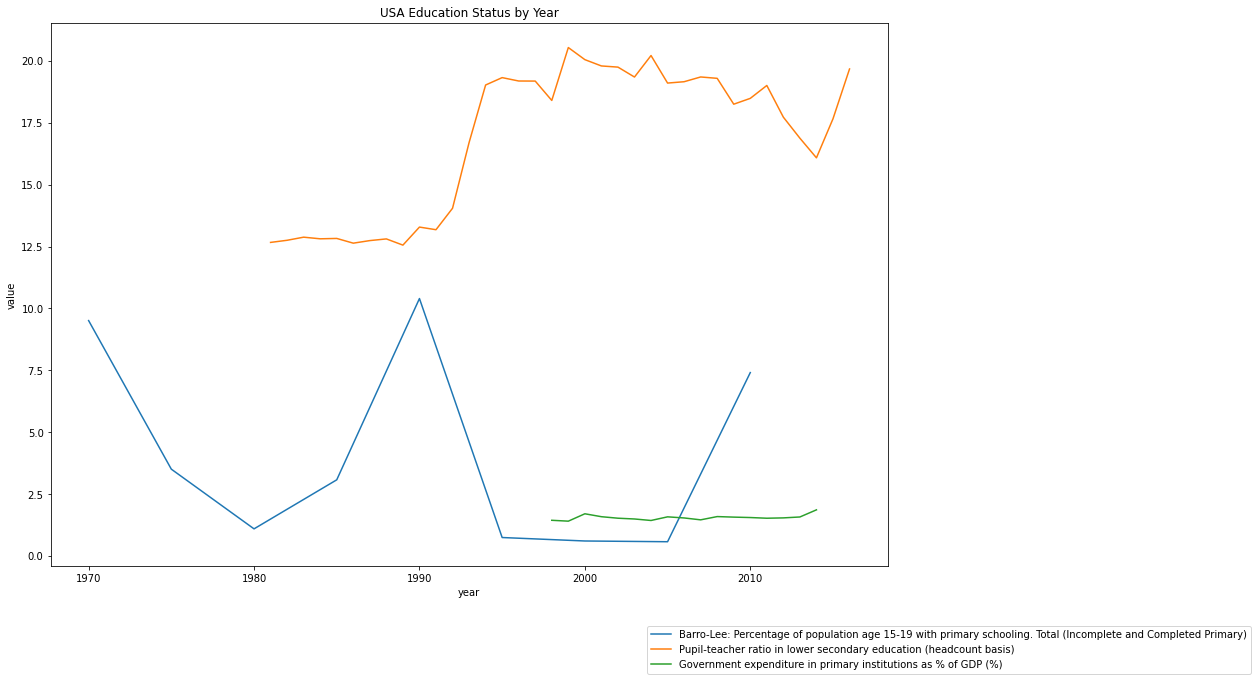

In [ ]:
plt.figure(figsize = (15, 10))
sns.lineplot(x = time_series_data_usa.year, y = time_series_data_usa.value, ci=None, hue = time_series_data_usa.indicator_name, data = time_series_data_usa)
plt.legend(bbox_to_anchor =(1.44,-0.10), loc='upper right')
plt.title('USA Education Status by Year')

As we can see, USA government expenditure in primary institutions has remained stable for around the past 20 years. This means that the government has kept their budget on education as % of GDP unchanged without significantly cutting it down or expanding it.
However, for pupil-teacher ratio, we do see a regression. As compared with 1980 in which 12.5 students share 1 teacher, in 2000, an average of 20 students have to share 1 teacher in lower secondary education. Overall, we see some flunctuations, but the pupil-teacher ratio is indeed increasing from the 1990s.
For percentage of population age 15-19 with primary schooling, we see an improvement starting around 2005. But I am still surprised that the value does not go upwards consistently.

##### World average by year


In [ ]:
%%bigquery world_avg_primary_schooling --project $project_id

SELECT year, AVG(value) AS value
FROM `bigquery-public-data.world_bank_intl_education.international_education` 
WHERE indicator_name = 'Barro-Lee: Percentage of population age 15-19 with primary schooling. Total (Incomplete and Completed Primary)' 
GROUP BY year 

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
%%bigquery world_avg_gov_exp --project $project_id

SELECT year, AVG(value) AS value
FROM `bigquery-public-data.world_bank_intl_education.international_education` 
WHERE indicator_name = 'Government expenditure in primary institutions as % of GDP (%)'
GROUP BY year 

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
%%bigquery world_avg_teacher_ratio --project $project_id

SELECT year, AVG(value) AS value
FROM `bigquery-public-data.world_bank_intl_education.international_education` 
WHERE indicator_name = 'Pupil-teacher ratio in lower secondary education (headcount basis)'
GROUP BY year 

Query is running:   0%|          |

Downloading:   0%|          |

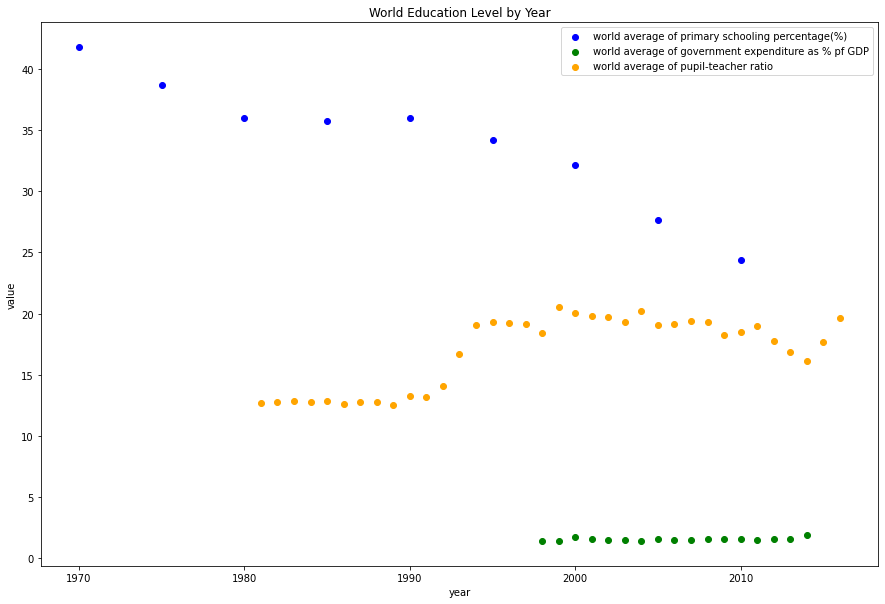

In [ ]:
plt.figure(figsize = (15, 10))
plt.scatter(world_avg_primary_schooling.year, world_avg_primary_schooling.value, c = 'blue', label = 'world average of primary schooling percentage(%)')
plt.scatter(world_avg_gov_exp.year, world_avg_gov_exp.value, c = 'green', label = 'world average of government expenditure as % pf GDP')
plt.scatter(world_avg_teacher_ratio.year, world_avg_teacher_ratio.value, c = 'orange', label = 'world average of pupil-teacher ratio')
plt.legend(bbox_to_anchor =(1.44,-0.10), loc='lower right')
plt.title('World Education Level by Year')
plt.xlabel("year")
plt.ylabel("value")
plt.legend(loc="upper right")

If we observe the three education indicators in terms of world average, we can see that government expenditure as % of GDP remains stable around the world. This tells us that policy makers in governments tend not to cut down or expand education budget. It is surprising, however, that both the pupil-teacher ratio and primary schooling attainment rate regresses throughout the years. My guess is that since the population is constantly growing and the education budget remains the same, the education resource an individual has decreases. We'll explore population next.

##### World population

In [ ]:
%%bigquery world_population --project $project_id

SELECT avg(year_1971), avg(year_1972), avg(year_1973), avg(year_1974), avg(year_1975), avg(year_1976), avg(year_1977), avg(year_1978), avg(year_1979), avg(year_1980), avg(year_1981), avg(year_1982), avg(year_1983), 
avg(year_1984), avg(year_1985), avg(year_1986), avg(year_1987), avg(year_1988), avg(year_1989), avg(year_1990), avg(year_1991), avg(year_1992), avg(year_1993), avg(year_1994), avg(year_1995), avg(year_1996), avg(year_1997),
avg(year_1998), avg(year_1999), avg(year_2000), avg(year_2001), avg(year_2002), avg(year_2003), avg(year_2004), avg(year_2005), avg(year_2006), avg(year_2007), avg(year_2008), avg(year_2009), avg(year_2010), avg(year_2011), avg(year_2012), avg(year_2013),
avg(year_2014), avg(year_2015), avg(year_2016), avg(year_2017), avg(year_2018)
FROM `bigquery-public-data.world_bank_global_population.population_by_country`  

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
world_population_np = world_population.to_numpy()
world_population_np = world_population_np.reshape((world_population_np.size, -1))

In [ ]:
year_np = np.array(['1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', 
'1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
'1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
'2014', '2015', '2016', '2017', '2018'])

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47],
 <a list of 48 Text major ticklabel objects>)

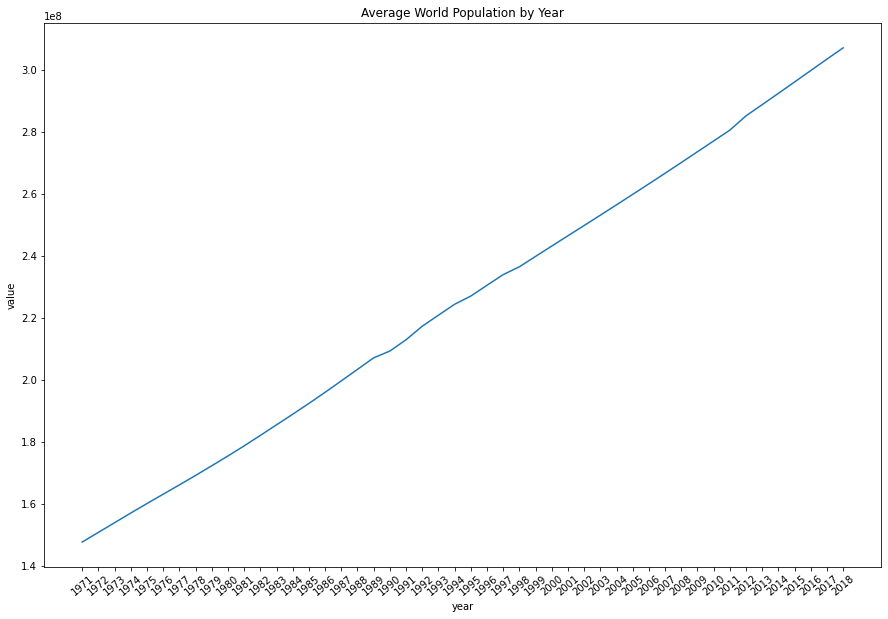

In [ ]:
plt.figure(figsize = (15, 10))
plt.plot(year_np, world_population_np)
plt.title('Average World Population by Year')
plt.xlabel("year")
plt.ylabel("value")
plt.xticks(rotation = 40)

As the plot shows, average world population by country is growing linearly throughout the years. Under the condition that governments do not increase education budget, it is plausible that some education indicators are not improving as expected.

### Possible factors affecting education

#### Income vs. Education

When I think of the biggest or most obvious factor that affects a country's education level, "income" is the first thing that comes to my mind. In this section, I am going to explore how a country's income group associates with its education level.
In the `world_bank_wdi` dataset, income can be divided into three different groups: Low income, Lower middle income, Higher middle income, and High income. The questions I am trying to answering here:

1. How is income group related to education? 

2. Is there a high correlation between income group and education?

In [ ]:
%%bigquery income_education --project $project_id

SELECT t3.country_code, t3.income_group ,t4.indicator_name, t4.value
FROM `bigquery-public-data.world_bank_wdi.country_summary` t3
JOIN (
SELECT indicator_name, t2.country_code, AVG(value) AS value
FROM `bigquery-public-data.world_bank_wdi.country_summary` t1, `bigquery-public-data.world_bank_intl_education.international_education` t2
WHERE t1.country_code = t2.country_code AND 
income_group IS NOT NULL AND 
indicator_name = 'Barro-Lee: Percentage of population age 15-19 with primary schooling. Total (Incomplete and Completed Primary)' OR indicator_name = 'Government expenditure in primary institutions as % of GDP (%)' OR 
indicator_name = 'Pupil-teacher ratio in lower secondary education (headcount basis)'
GROUP BY indicator_name, t2.country_code 
) t4 ON t3.country_code = t4.country_code
WHERE t3.income_group IS NOT NULL

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
gov_exp = income_education[income_education.indicator_name == 'Government expenditure in primary institutions as % of GDP (%)']
primary_schooling = income_education[income_education.indicator_name == 'Barro-Lee: Percentage of population age 15-19 with primary schooling. Total (Incomplete and Completed Primary)']
teacher_ratio = income_education[income_education.indicator_name == 'Pupil-teacher ratio in lower secondary education (headcount basis)']

Text(0, 0.5, 'Income level')

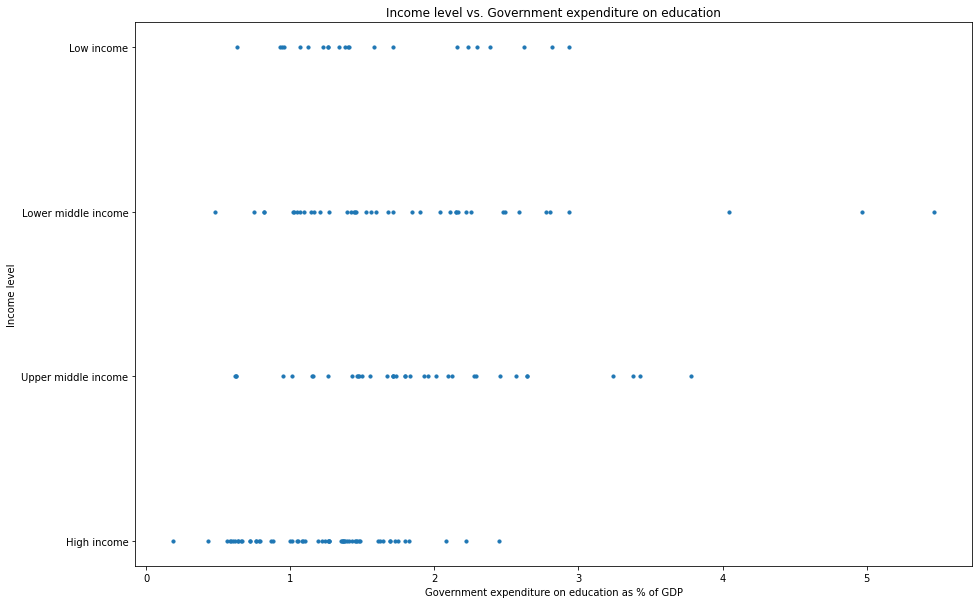

In [ ]:
# plot income vs. gov_exp value(%)
plt.figure(figsize = (15, 10))
plt.scatter(gov_exp.value, gov_exp.income_group, s = 10)
plt.title("Income level vs. Government expenditure on education")
plt.xlabel("Government expenditure on education as % of GDP")
plt.ylabel("Income level")

Text(0, 0.5, 'Income level')

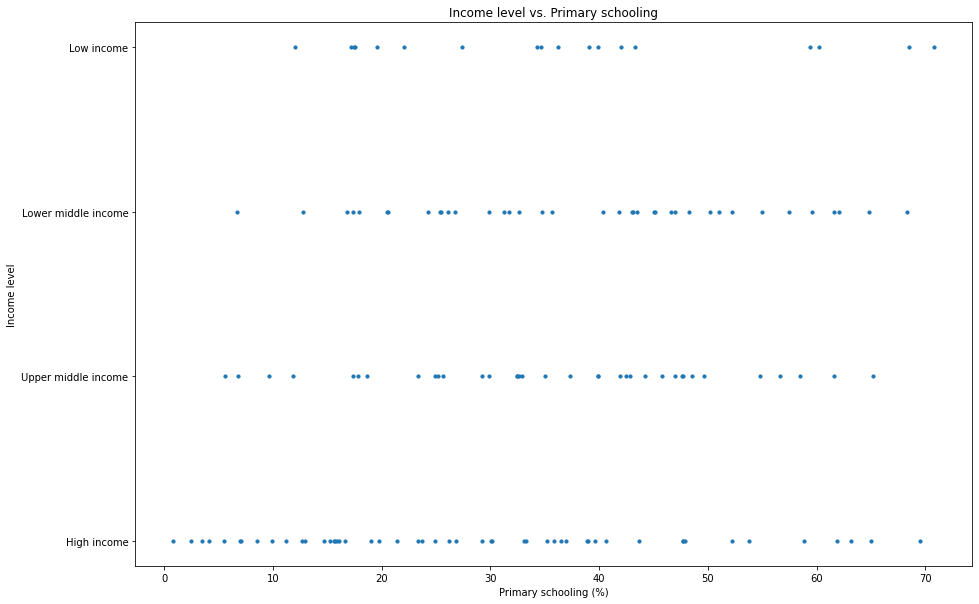

In [ ]:
# plot income vs. primary_schooling(%)
plt.figure(figsize = (15, 10))
plt.scatter(primary_schooling.value, primary_schooling.income_group, s = 10)
plt.title("Income level vs. Primary schooling")
plt.xlabel("Primary schooling (%)")
plt.ylabel("Income level")

Text(0, 0.5, 'Income level')

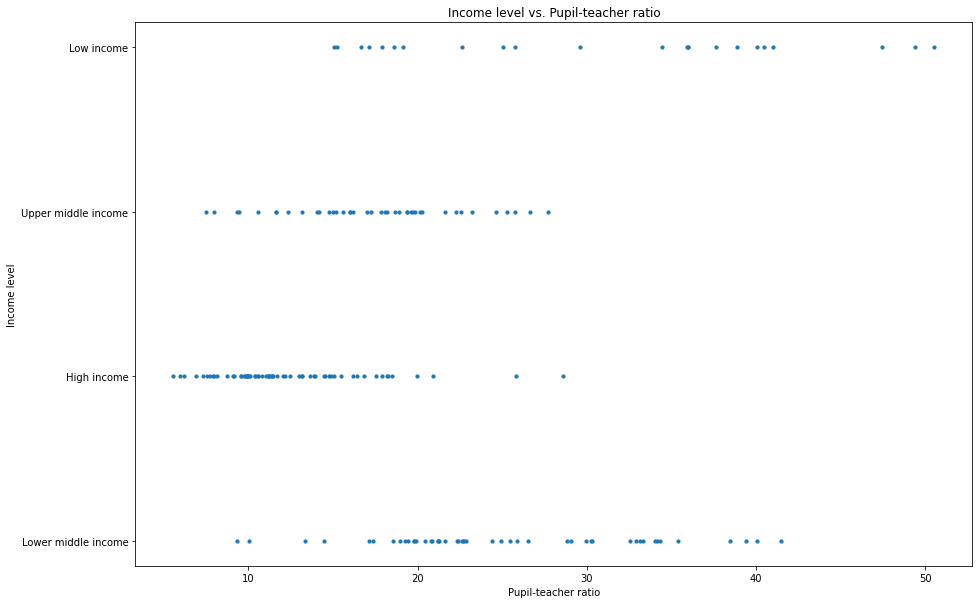

In [ ]:
# plot income vs. teacher ratio 
plt.figure(figsize = (15, 10))
plt.scatter(teacher_ratio.value, teacher_ratio.income_group, s = 10)
plt.title("Income level vs. Pupil-teacher ratio")
plt.xlabel("Pupil-teacher ratio")
plt.ylabel("Income level")

As seen in the above three plots, we can see that for pupil-teacher ratio, countries with high income tend to have lower pupil-teacher ratio. However, for the other two indicators, primary schooling rate and government expenditure, high income countries do not have significantly better performance compared with low or middle income ones. Some low income countries might even have high government expenditure on education. Apparently, income group alone is not sufficient to distinguish high education level and low education level. We need to look at various other factors that might not seem highly related to education at first glance.

#### Health vs. Education

First, let's start from defining what is high/low education level. I've searched through the Web to look for exact definition, but there is a general lack of informatoin in terms of what really counts as high/low education level. Therefore, I am defining education level myself by considering three different education aspects: 

1. Education Inputs: How much a government is spending (or inputing) into education
2. Participation: What is the participation? School attainment rate?
3. Outcome: Learning outcome of pupils


What WDI education indicators are we using?
1. Inputs: Pupil-teacher ratio, primary
2. Participation: School enrollment, primary (% gross)
3. Outcome: Primary completion rate, total (% of relevant age group)

##### Correlation between different indicators

Let's take a look at the `world_bank_health_population` dataset first. We have over 400 health indicators. It is impossible to calculate their correlation with education level one by one. Therefore, I have to cherry pick some indicators first.

In [ ]:
%%bigquery --project $project_id

SELECT t1.topic, t1.indicator_name
FROM `bigquery-public-data.world_bank_health_population.series_summary` t1,
(
SELECT topic
FROM `bigquery-public-data.world_bank_health_population.series_summary`
GROUP BY topic
) t2
where t1.topic = t2.topic
LIMIT 10

Query is running:   0%|          |

Downloading:   0%|          |

,topic,indicator_name
0,Reproductive health,Prevalence of syphilis (% of women attending a...
1,Reproductive health,Postnatal care coverage (% mothers)
2,Reproductive health,Demand for family planning satisfied by any me...
3,Reproductive health,Maternal leave benefits (% of wages paid)
4,Reproductive health,"Maternal mortality ratio (national estimate, p..."
5,Reproductive health,"Mean age at first marriage, female"
6,Reproductive health,"Mean age at first marriage, male"
7,Reproductive health,Women who were first married by age 15 (% of w...
8,Reproductive health,Women who were first married by age 18 (% of w...
9,Reproductive health,Number of maternal deaths


I selected four different indicators to represent different aspects of health.

What health indicators are considered more relevant?
1. Reproductive: Life expectancy at birth, total (years)
2. Sanitation: People using safely managed drinking water services (% of population)
3. Medical resources: Physicians (per 1,000 people)
4. Cause of death: Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)


In [ ]:
%%bigquery health_education_correlation --project $project_id

SELECT t1.country_code, t1.year, health_indicator, health_indicator_value, education_indicator, education_indicator_value
FROM 
(
SELECT country_code, year, indicator_name AS health_indicator, value AS health_indicator_value
FROM `bigquery-public-data.world_bank_health_population.health_nutrition_population` 
WHERE indicator_name = 'Life expectancy at birth, total (years)' OR
indicator_name = 'People using safely managed drinking water services (% of population)' OR
indicator_name = 'Physicians (per 1,000 people)' OR
indicator_name = 'Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)' OR
indicator_name = 'pulation growth (annual %)'
) t1,
(
SELECT country_code, year, indicator_name AS education_indicator, value AS education_indicator_value
FROM `bigquery-public-data.world_bank_wdi.indicators_data` 
WHERE indicator_name = 'Pupil-teacher ratio, primary' OR
indicator_name = 'School enrollment, primary (% gross)' OR
indicator_name = 'Primary completion rate, total (% of relevant age group)'
) t2
WHERE t1.country_code = t2.country_code AND t1.year = t2.year

Query is running:   0%|          |

Downloading:   0%|          |

###### Life expectancy vs. Pupil-teacher ratio

In [ ]:
# correlation between health(Life expectancy at birth, total (years)) and education(Pupil-teacher ratio, primary)
conditions = [
    (health_education_correlation.health_indicator == 'Life expectancy at birth, total (years)') & (health_education_correlation.education_indicator == 'Pupil-teacher ratio, primary')
]
life_pupil = health_education_correlation[conditions[0]]
r_life_pupil, p_life_pupil = scipy.stats.pearsonr(life_pupil['health_indicator_value'], life_pupil['education_indicator_value'])
print("The pearson correlation coefficient is:", r_life_pupil)
print("The p-value is:", p_life_pupil)

The pearson correlation coefficient is: -0.7454263280557608
The p-value is: 0.0


Text(0, 0.5, 'Pupil-teacher ratio')

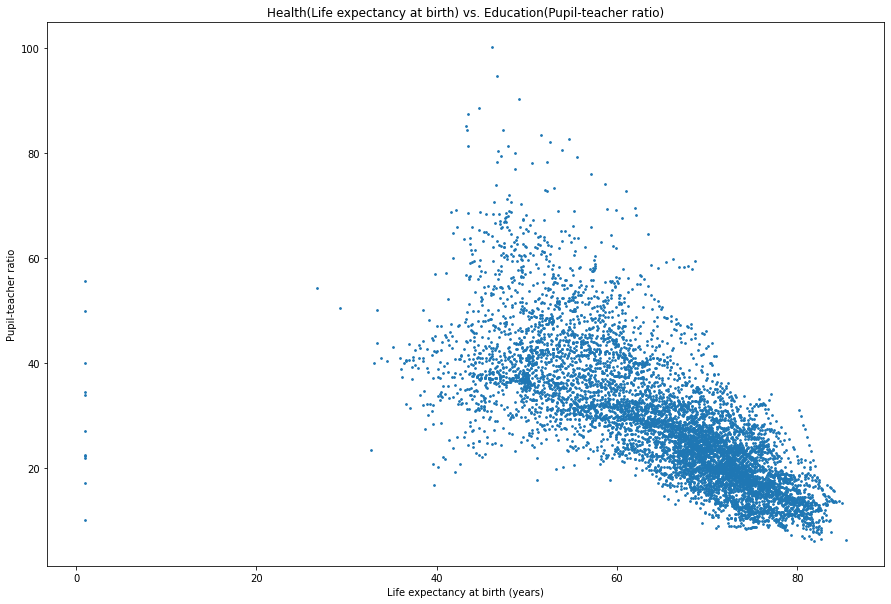

In [ ]:
plt.figure(figsize = (15, 10))
plt.scatter(life_pupil['health_indicator_value'], life_pupil['education_indicator_value'],  s = 3)
plt.title("Health(Life expectancy at birth) vs. Education(Pupil-teacher ratio)")
plt.xlabel("Life expectancy at birth (years)")
plt.ylabel("Pupil-teacher ratio")

As from the plot above, we can see that life expectancy is highly correlated with pupil-teacher ratio. Countries with longer life expectancy tend to have smaller pupil-teacher ratio. This is reasonable as longer life expectancy represent better living environment and general welfare of a country's citizens.

I am also using Pearson Correlation Coefficient (PCC) to evaluate their relateness. PCC measures the linear correlation between two datasets and has a value between -1 and 1, with an absolute value close to 1 being the most correlated. We can see that life expectanct and pupil-teacher ratio has a PCC of -0.74, which signifies the high correlation between the two indicators.


###### Drinking water service vs. Pupil-teacher ratio

In [ ]:
# correlation between health(People using safely managed drinking water services (% of population)) and education(Pupil-teacher ratio, primary)
conditions = [
    (health_education_correlation.health_indicator == 'People using safely managed drinking water services (% of population)') & (health_education_correlation.education_indicator == 'Pupil-teacher ratio, primary')
]
water_pupil = health_education_correlation[conditions[0]]
r_water_pupil, p_water_pupil = scipy.stats.pearsonr(water_pupil['health_indicator_value'], water_pupil['education_indicator_value'])
print("The pearson correlation coefficient is:", r_water_pupil)
print("The p-value is:", p_water_pupil)

The pearson correlation coefficient is: -0.6805433035545685
The p-value is: 2.30682201275133e-266


Text(0, 0.5, 'Pupil-teacher ratio')

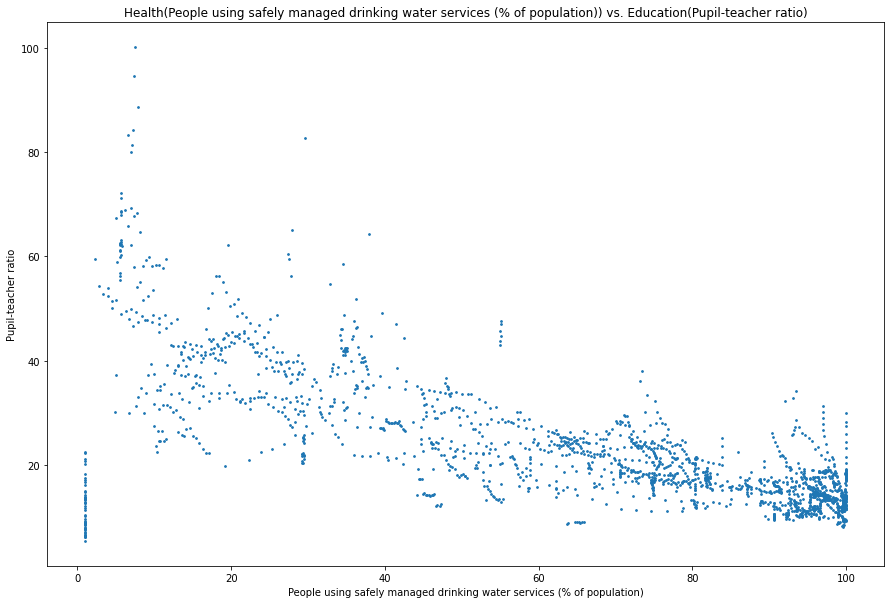

In [ ]:
plt.figure(figsize = (15, 10))
plt.scatter(water_pupil['health_indicator_value'], water_pupil['education_indicator_value'], s = 3)
plt.title("Health(People using safely managed drinking water services (% of population)) vs. Education(Pupil-teacher ratio)")
plt.xlabel("People using safely managed drinking water services (% of population)")
plt.ylabel("Pupil-teacher ratio")

Although there are some outliers, we can still see that drinking water service is negatively correlated with pupil-teacher ratio. The PCC value is -0.68, which also tells us the high correlation between drinking water service and pupil-teacher ratio.

###### Physicians vs. Pupil-teacher ratio

In [ ]:
# correlation between health(Physicians (per 1,000 people)) and education(Pupil-teacher ratio, primary)

conditions = [
    (health_education_correlation.health_indicator == 'Physicians (per 1,000 people)' ) & (health_education_correlation.education_indicator == 'Pupil-teacher ratio, primary')
]
physicians_pupil = health_education_correlation[conditions[0]]
r_physicians_pupil, p_physicians_pupil = scipy.stats.pearsonr(physicians_pupil['health_indicator_value'], physicians_pupil['education_indicator_value'])
print("The pearson correlation coefficient is:", r_physicians_pupil)
print("The p-value is:", p_physicians_pupil)

The pearson correlation coefficient is: -0.6905378801412039
The p-value is: 0.0


Text(0, 0.5, 'Pupil-teacher ratio')

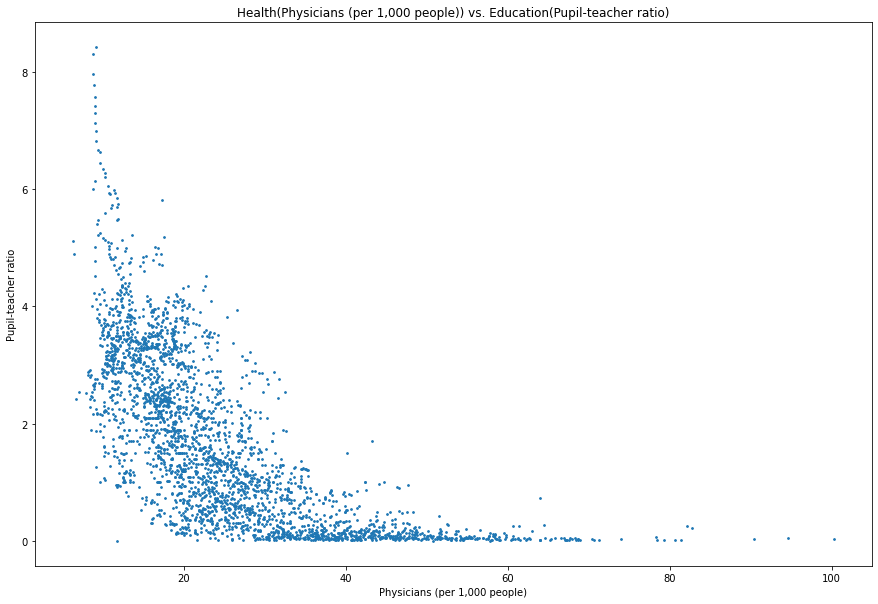

In [ ]:
plt.figure(figsize = (15, 10))
plt.scatter(physicians_pupil['education_indicator_value'], physicians_pupil['health_indicator_value'], s = 3)
plt.title("Health(Physicians (per 1,000 people)) vs. Education(Pupil-teacher ratio)")
plt.xlabel("Physicians (per 1,000 people)")
plt.ylabel("Pupil-teacher ratio")

With PCC value equals to -0.68 and the plot above, we can see that there is a negative correlation between physicians (per 1000 people) and pupil-teacher ratio.

###### Cause of death vs. Pupil-teacher ratio

The pearson correlation coefficient is: 0.8580262207316861
The p-value is: 5.567229099680242e-150


Text(0, 0.5, 'Pupil-teacher ratio')

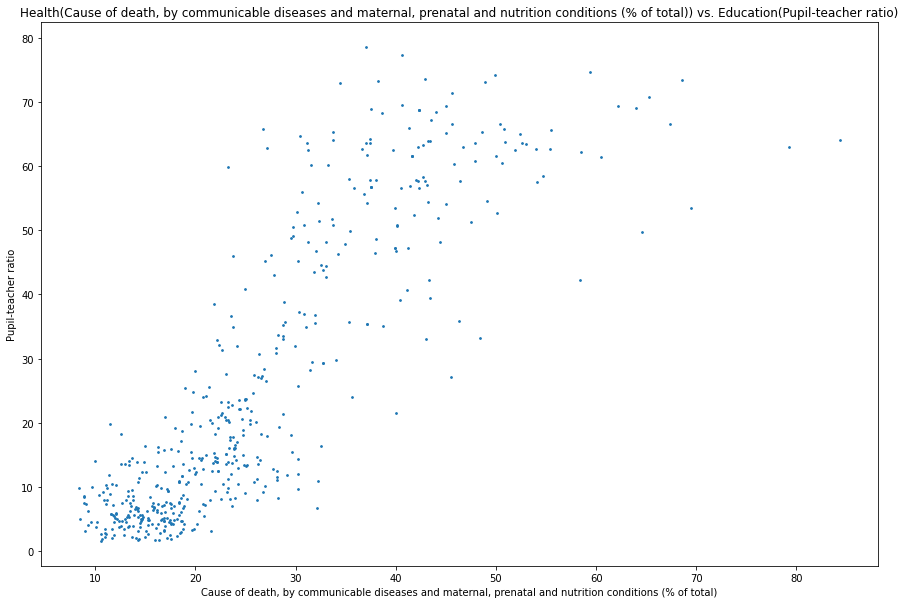

In [ ]:
# correlation between health(Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)) and education(Pupil-teacher ratio, primary)
conditions = [
    (health_education_correlation.health_indicator == 'Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)' ) & (health_education_correlation.education_indicator == 'Pupil-teacher ratio, primary')
]
death_pupil = health_education_correlation[conditions[0]]
r_death_pupil, p_death_pupil = scipy.stats.pearsonr(death_pupil['health_indicator_value'], death_pupil['education_indicator_value'])
print("The pearson correlation coefficient is:", r_death_pupil)
print("The p-value is:", p_death_pupil)

plt.figure(figsize = (15, 10))
plt.scatter(death_pupil['education_indicator_value'], death_pupil['health_indicator_value'], s = 3)
plt.title("Health(Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)) vs. Education(Pupil-teacher ratio)")
plt.xlabel("Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)")
plt.ylabel("Pupil-teacher ratio")

Cause of death (by communicable diseases) is positively correlated with pupil-teacher ratio as seen in the plot and the PCC value(0.85).

###### Life expectancy vs. School enrollment rate

The pearson correlation coefficient is: 0.5223725923888606
The p-value is: 0.0


Text(0, 0.5, 'School enrollment, primary (% gross)')

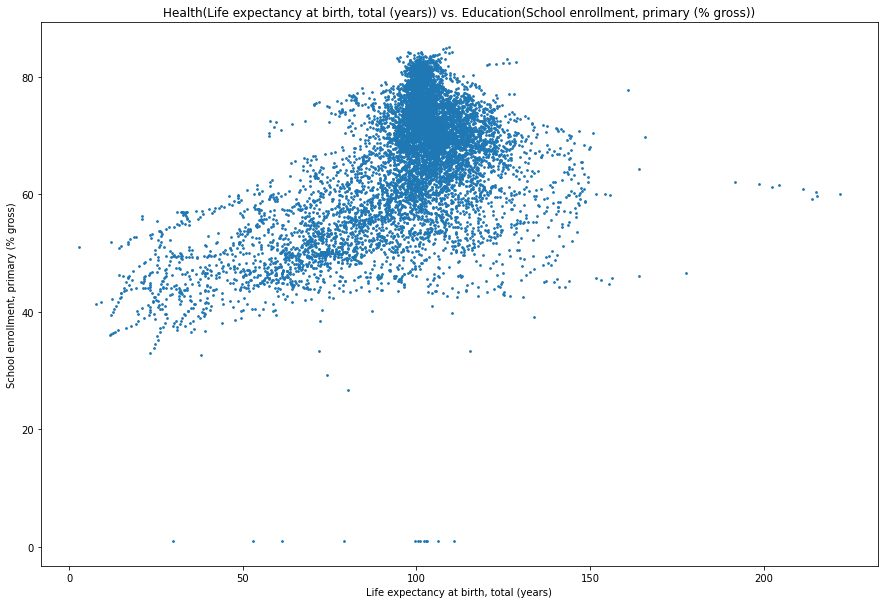

In [ ]:
# correlation between health(Life expectancy at birth, total (years)) and education(School enrollment, primary (% gross))

conditions = [
    (health_education_correlation.health_indicator == 'Life expectancy at birth, total (years)') & (health_education_correlation.education_indicator == 'School enrollment, primary (% gross)')
]
life_enroll = health_education_correlation[conditions[0]]
r_life_enroll, p_life_enroll = scipy.stats.pearsonr(life_enroll['health_indicator_value'], life_enroll['education_indicator_value'])
print("The pearson correlation coefficient is:", r_life_enroll)
print("The p-value is:", p_life_enroll)

plt.figure(figsize = (15, 10))
plt.scatter(life_enroll['education_indicator_value'], life_enroll['health_indicator_value'], s = 3)
plt.title("Health(Life expectancy at birth, total (years)) vs. Education(School enrollment, primary (% gross))")
plt.xlabel("Life expectancy at birth, total (years)")
plt.ylabel("School enrollment, primary (% gross)")

The correlation between life expectancy and school enrollment rate is low as seen in the plot and the PCC value (~0.5). We can discard this feature in the *Data Prediction* section.

###### Drinking water service vs. School enrollment rate

The pearson correlation coefficient is: -0.09895933021573014
The p-value is: 1.5282603949362913e-06


Text(0, 0.5, 'School enrollment, primary (% gross)')

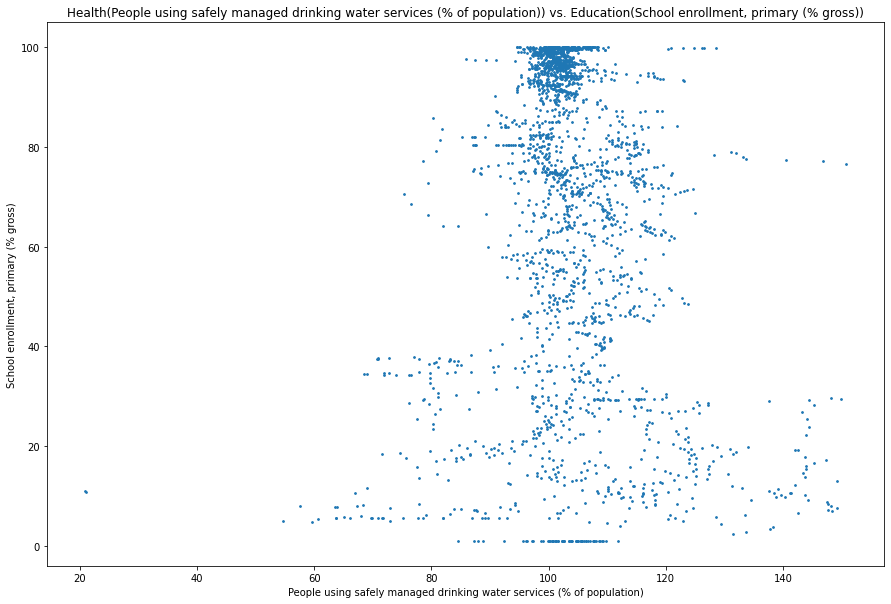

In [ ]:
# correlation between health(People using safely managed drinking water services (% of population)) and education(School enrollment, primary (% gross))

conditions = [
    (health_education_correlation.health_indicator == 'People using safely managed drinking water services (% of population)') & (health_education_correlation.education_indicator == 'School enrollment, primary (% gross)')
]
water_enroll = health_education_correlation[conditions[0]]
r_water_enroll, p_water_enroll = scipy.stats.pearsonr(water_enroll['health_indicator_value'], water_enroll['education_indicator_value'])
print("The pearson correlation coefficient is:", r_water_enroll)
print("The p-value is:", p_water_enroll)

plt.figure(figsize = (15, 10))
plt.scatter(water_enroll['education_indicator_value'], water_enroll['health_indicator_value'], s = 3)
plt.title("Health(People using safely managed drinking water services (% of population)) vs. Education(School enrollment, primary (% gross))")
plt.xlabel("People using safely managed drinking water services (% of population)")
plt.ylabel("School enrollment, primary (% gross)")

Drinking water service has a low correlaton with school enrollment rate. This attribute will be discarded when training machine learning models.

###### Physicians vs. School enrollment rate

The pearson correlation coefficient is: 0.1745156915528196
The p-value is: 1.438609494991396e-26


Text(0, 0.5, 'School enrollment, primary (% gross)')

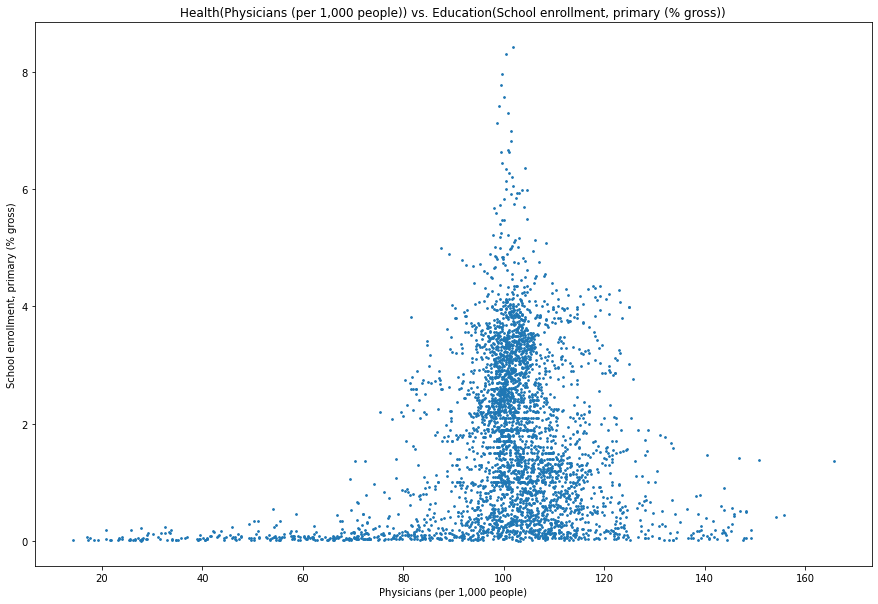

In [ ]:
# correlation between health(Physicians (per 1,000 people)) and education(School enrollment, primary (% gross))

conditions = [
    (health_education_correlation.health_indicator == 'Physicians (per 1,000 people)') & (health_education_correlation.education_indicator == 'School enrollment, primary (% gross)')
]
physicians_enroll = health_education_correlation[conditions[0]]
r_physicians_enroll, p_physicians_enroll = scipy.stats.pearsonr(physicians_enroll['health_indicator_value'], physicians_enroll['education_indicator_value'])
print("The pearson correlation coefficient is:", r_physicians_enroll)
print("The p-value is:", p_physicians_enroll)

plt.figure(figsize = (15, 10))
plt.scatter(physicians_enroll['education_indicator_value'], physicians_enroll['health_indicator_value'], s = 3)
plt.title("Health(Physicians (per 1,000 people)) vs. Education(School enrollment, primary (% gross))")
plt.xlabel("Physicians (per 1,000 people)")
plt.ylabel("School enrollment, primary (% gross)")

PCC = 0.17 signifies a low correlation between physicians(per 1000 peopl) and school enrollment rate.

###### Cause of death vs. School enrollment rate

The pearson correlation coefficient is: -0.21581104323893985
The p-value is: 2.733378200012913e-09


Text(0, 0.5, 'School enrollment, primary (% gross)')

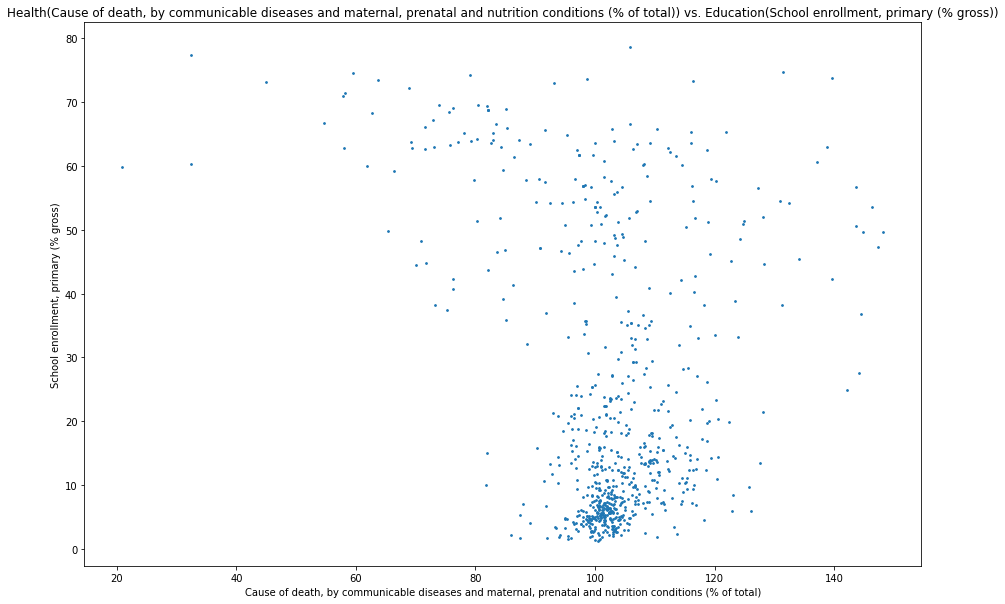

In [ ]:
# correlation between health(Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)) and education(School enrollment, primary (% gross))

conditions = [
    (health_education_correlation.health_indicator == 'Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)') & (health_education_correlation.education_indicator == 'School enrollment, primary (% gross)')
]
death_enroll = health_education_correlation[conditions[0]]
r_death_enroll, p_death_enroll = scipy.stats.pearsonr(death_enroll['health_indicator_value'], death_enroll['education_indicator_value'])
print("The pearson correlation coefficient is:", r_death_enroll)
print("The p-value is:", p_death_enroll)

plt.figure(figsize = (15, 10))
plt.scatter(death_enroll['education_indicator_value'], death_enroll['health_indicator_value'], s = 3)
plt.title("Health(Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)) vs. Education(School enrollment, primary (% gross))")
plt.xlabel("Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)")
plt.ylabel("School enrollment, primary (% gross)")

PCC = -0.2 signifies a low correlatoin rate betweeen cause of death(by communicable diseases) and school enrollment rate.

###### Life expectancy vs. Primary completion rate

The pearson correlation coefficient is: 0.7977050882952621
The p-value is: 0.0


Text(0, 0.5, 'Primary completion rate, total (% of relevant age group)')

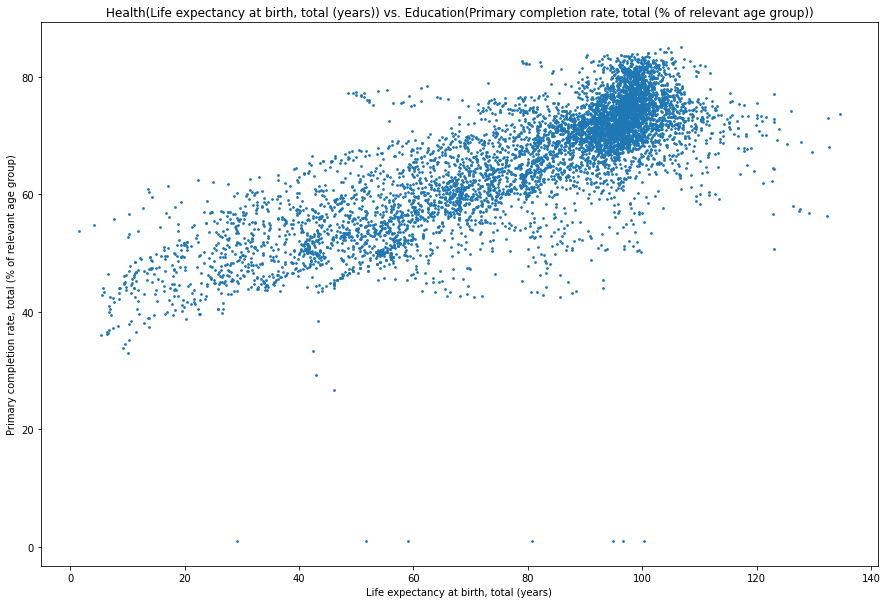

In [ ]:
# correlation between health( Life expectancy at birth, total (years)) and education(Primary completion rate, total (% of relevant age group))

conditions = [
    (health_education_correlation.health_indicator == 'Life expectancy at birth, total (years)') & (health_education_correlation.education_indicator == 'Primary completion rate, total (% of relevant age group)')
]
life_complete = health_education_correlation[conditions[0]]
r_life_complete, p_life_complete = scipy.stats.pearsonr(life_complete['health_indicator_value'], life_complete['education_indicator_value'])
print("The pearson correlation coefficient is:", r_life_complete)
print("The p-value is:", p_life_complete)

plt.figure(figsize = (15, 10))
plt.scatter(life_complete['education_indicator_value'], life_complete['health_indicator_value'], s = 3)
plt.title("Health(Life expectancy at birth, total (years)) vs. Education(Primary completion rate, total (% of relevant age group))")
plt.xlabel("Life expectancy at birth, total (years)")
plt.ylabel("Primary completion rate, total (% of relevant age group)")

PCC = 0.79 and the plot above shows positive and strong correlation between life expectancy and primary school enrollment rate.

###### Drinking water service vs. Primary completion rate

The pearson correlation coefficient is: 0.595625305565765
The p-value is: 1.5519908053717574e-192


Text(0, 0.5, 'Primary completion rate, total (% of relevant age group)')

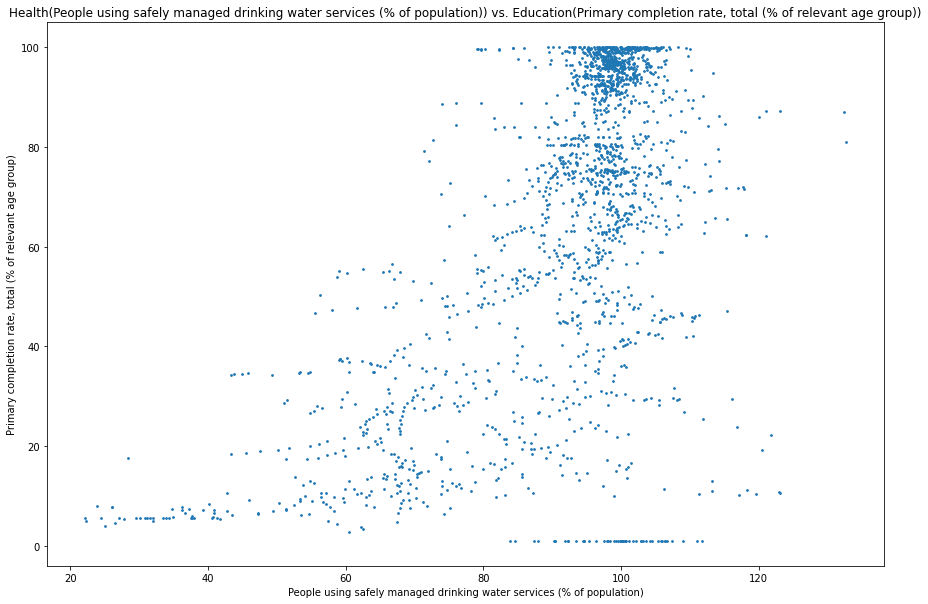

In [ ]:
# correlation between health(People using safely managed drinking water services (% of population)) and education(Primary completion rate, total (% of relevant age group))


conditions = [
    (health_education_correlation.health_indicator == 'People using safely managed drinking water services (% of population)') & (health_education_correlation.education_indicator == 'Primary completion rate, total (% of relevant age group)')
]
water_complete = health_education_correlation[conditions[0]]
r_water_complete, p_water_complete = scipy.stats.pearsonr(water_complete['health_indicator_value'], water_complete['education_indicator_value'])
print("The pearson correlation coefficient is:", r_water_complete)
print("The p-value is:", p_water_complete)

plt.figure(figsize = (15, 10))
plt.scatter(water_complete['education_indicator_value'], water_complete['health_indicator_value'], s = 3)
plt.title("Health(People using safely managed drinking water services (% of population)) vs. Education(Primary completion rate, total (% of relevant age group))")
plt.xlabel("People using safely managed drinking water services (% of population)")
plt.ylabel("Primary completion rate, total (% of relevant age group)")

We can see a general positive correlation between the two indicators from the plot. However, the relation seems pretty weak according to the PCC value. Consider discarding this health indicator in the ML training phase.

###### Physicians vs. Primary completion rate

The pearson correlation coefficient is: 0.533875359689723
The p-value is: 3.887345200452448e-186


Text(0, 0.5, 'Primary completion rate, total (% of relevant age group)')

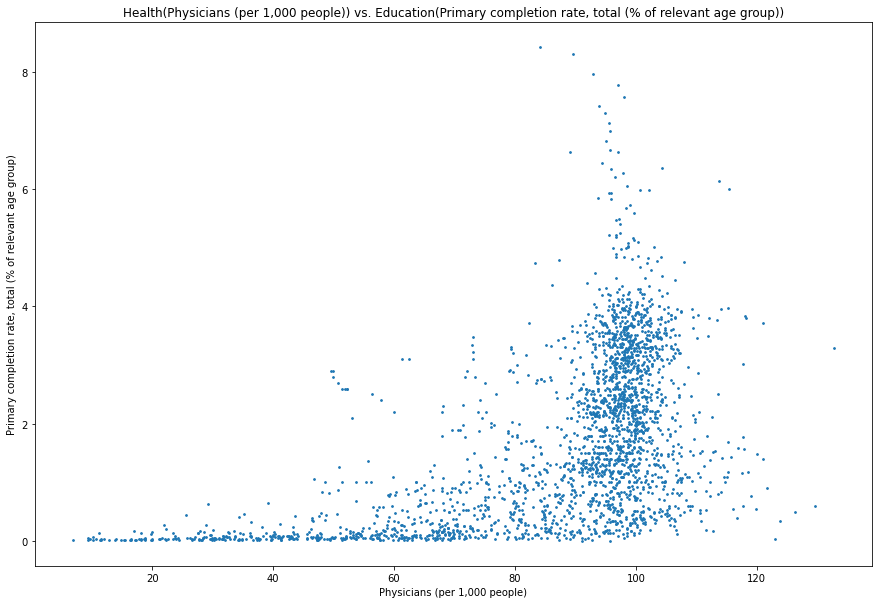

In [ ]:
# correlation between health(Physicians (per 1,000 people)) and education(Primary completion rate, total (% of relevant age group))

conditions = [
    (health_education_correlation.health_indicator == 'Physicians (per 1,000 people)') & (health_education_correlation.education_indicator == 'Primary completion rate, total (% of relevant age group)')
]
physicians_complete = health_education_correlation[conditions[0]]
r_physicians_complete, p_physicians_complete = scipy.stats.pearsonr(physicians_complete['health_indicator_value'], physicians_complete['education_indicator_value'])
print("The pearson correlation coefficient is:", r_physicians_complete)
print("The p-value is:", p_physicians_complete)

plt.figure(figsize = (15, 10))
plt.scatter(physicians_complete['education_indicator_value'], physicians_complete['health_indicator_value'], s = 3)
plt.title("Health(Physicians (per 1,000 people)) vs. Education(Primary completion rate, total (% of relevant age group))")
plt.xlabel("Physicians (per 1,000 people)")
plt.ylabel("Primary completion rate, total (% of relevant age group)")

Low correlation between physicians(per 1000 people) and primary completion rate.

###### Cause of death vs. Primary completion rate

The pearson correlation coefficient is: -0.8269168778911866
The p-value is: 1.1757845461327167e-163


Text(0, 0.5, 'Primary completion rate, total (% of relevant age group)')

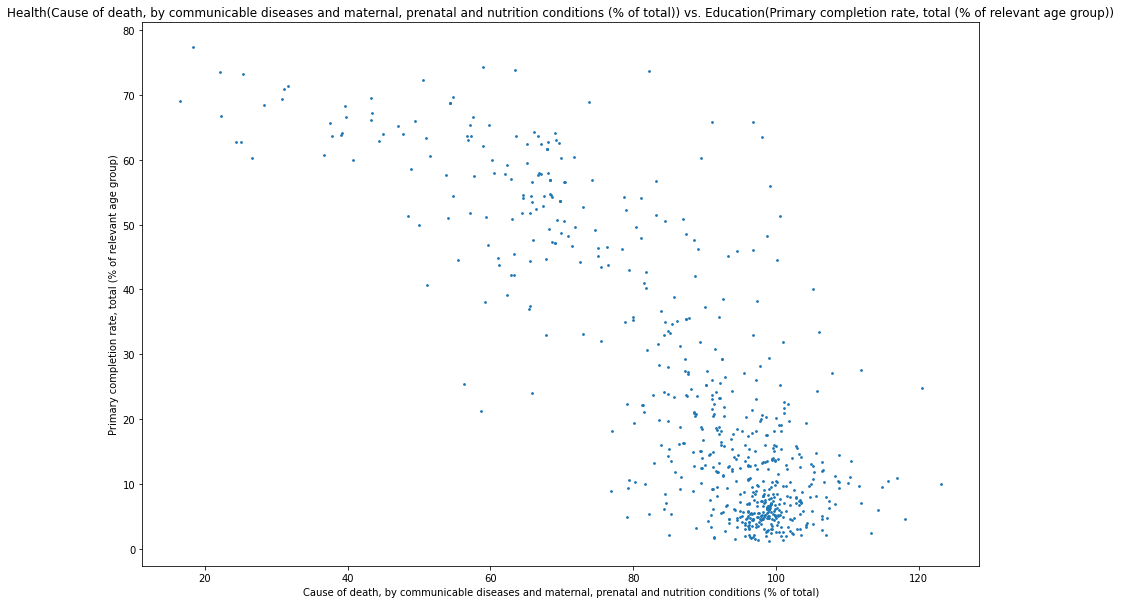

In [ ]:
# correlation between health(Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)) and education(Primary completion rate, total (% of relevant age group))

conditions = [
    (health_education_correlation.health_indicator == 'Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)') & (health_education_correlation.education_indicator == 'Primary completion rate, total (% of relevant age group)')
]
death_complete = health_education_correlation[conditions[0]]
r_death_complete, p_death_complete = scipy.stats.pearsonr(death_complete['health_indicator_value'], death_complete['education_indicator_value'])
print("The pearson correlation coefficient is:", r_death_complete)
print("The p-value is:", p_death_complete)

plt.figure(figsize = (15, 10))
plt.scatter(death_complete['education_indicator_value'], death_complete['health_indicator_value'], s = 3)
plt.title("Health(Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)) vs. Education(Primary completion rate, total (% of relevant age group))")
plt.xlabel("Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)")
plt.ylabel("Primary completion rate, total (% of relevant age group)")

Negative and strong correlation between cause of death(by communicable diseases) and primary completion rate as suggested by the PCC value and the plot above.

###### Health vs. Education Correlation Overview

Text(0.5, 1.0, 'Health and education indicators correlation')

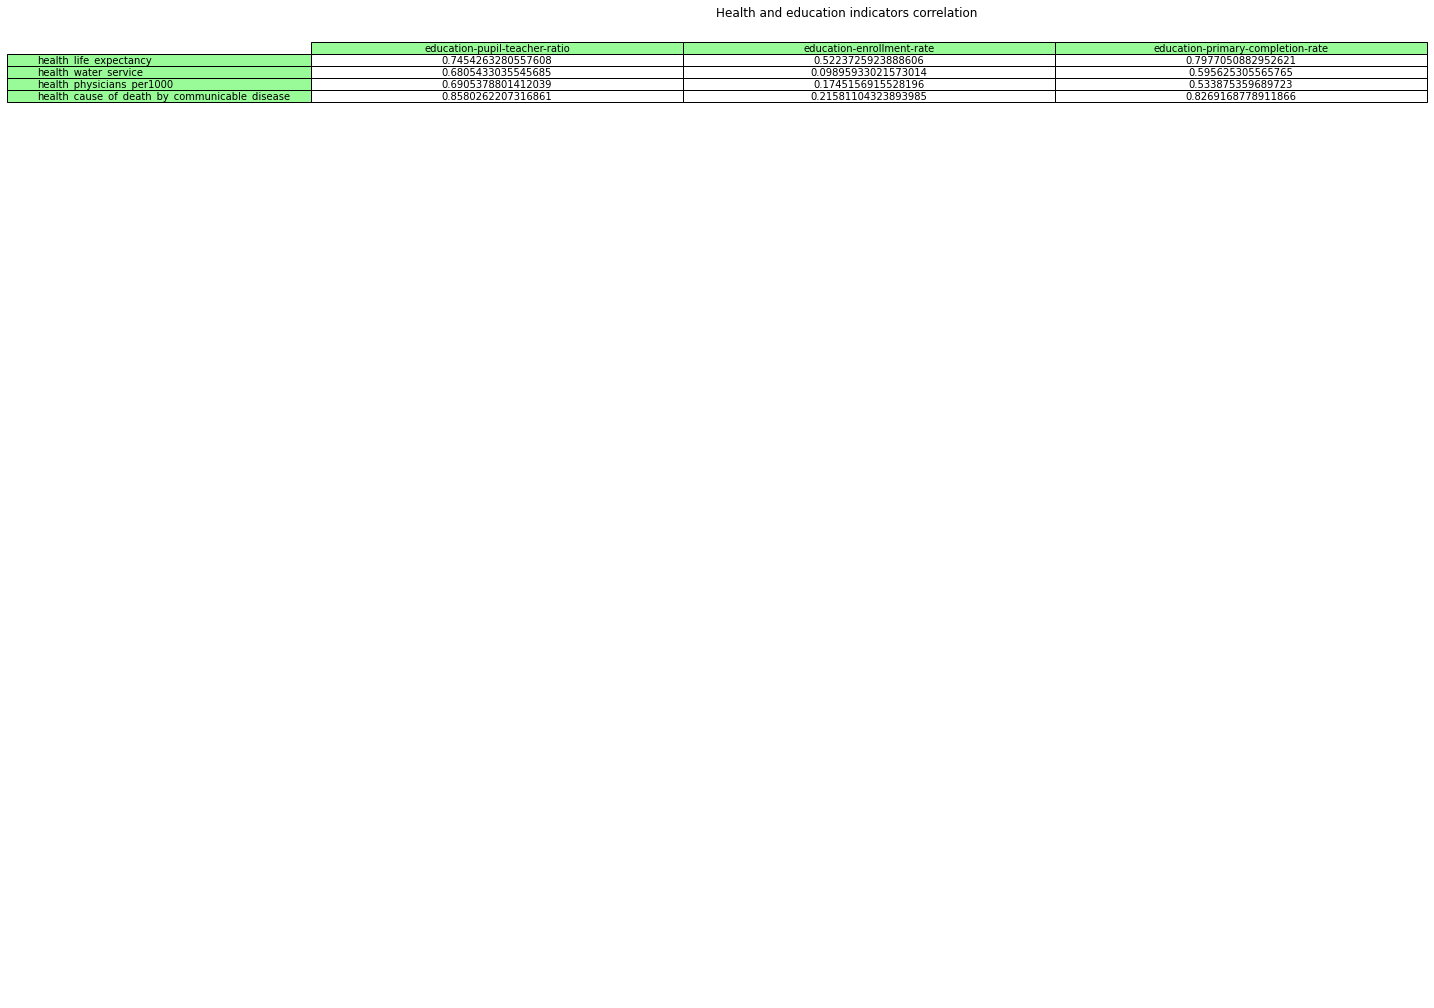

In [ ]:
# correlation table of health vs. education

col_names = ['education-pupil-teacher-ratio', 'education-enrollment-rate', 'education-primary-completion-rate']
row_names = ['health_life_expectancy', 'health_water_service', 'health_physicians_per1000', 'health_cause_of_death_by_communicable_disease']
cell_values = [
    [abs(r_life_pupil), abs(r_life_enroll), abs(r_life_complete)], 
    [abs(r_water_pupil), abs(r_water_enroll), abs(r_water_complete)], 
    [abs(r_physicians_pupil), abs(r_physicians_enroll), abs(r_physicians_complete)], 
    [abs(r_death_pupil), abs(r_death_enroll), abs(r_death_complete)] 
]

fig, ax = plt.subplots(figsize = (20, 18)) 
ax.set_axis_off() 
table = ax.table( 
    cellText = cell_values,  
    rowLabels = row_names,  
    colLabels = col_names, 
    rowColours =["palegreen"] * 4,  
    colColours =["palegreen"] * 3, 
    cellLoc ='center',  
    loc ='upper left')         
   
ax.set_title('Health and education indicators correlation', ) 


From this table, we can extract health indicators that are highly correlated with education level in the *Data Prediction* section. Larger PCC value signifies a higher correlation. For predicting pupil-teacher ratio, we expect to use all four health indicators as features to train, validate, and test the model.

#### Area vs. Education

As it occurs to me, the area where the country is at might also tells us something about the country's education level. For example, we expect North America to have a higher education level and Africe have a lower education level. Let's see if the dataset tells the same.

In [ ]:
%%bigquery area_education --project $project_id

SELECT t1.country_code, region, education_indicator, education_indicator_value
FROM `bigquery-public-data.world_bank_wdi.country_summary`  t1,
(
  SELECT country_code, year, indicator_name AS education_indicator, value AS education_indicator_value
  FROM `bigquery-public-data.world_bank_wdi.indicators_data` 
  WHERE indicator_name = 'Pupil-teacher ratio, primary' OR
  indicator_name = 'School enrollment, primary (% gross)' OR
  indicator_name = 'Primary completion rate, total (% of relevant age group)'
) t2
WHERE t1.country_code = t2.country_code
AND region IS NOT NULL

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
area_pupil = area_education[area_education.education_indicator == 'Pupil-teacher ratio, primary']
area_enroll = area_education[area_education.education_indicator == 'School enrollment, primary (% gross)']
area_complete = area_education[area_education.education_indicator == 'Primary completion rate, total (% of relevant age group)']

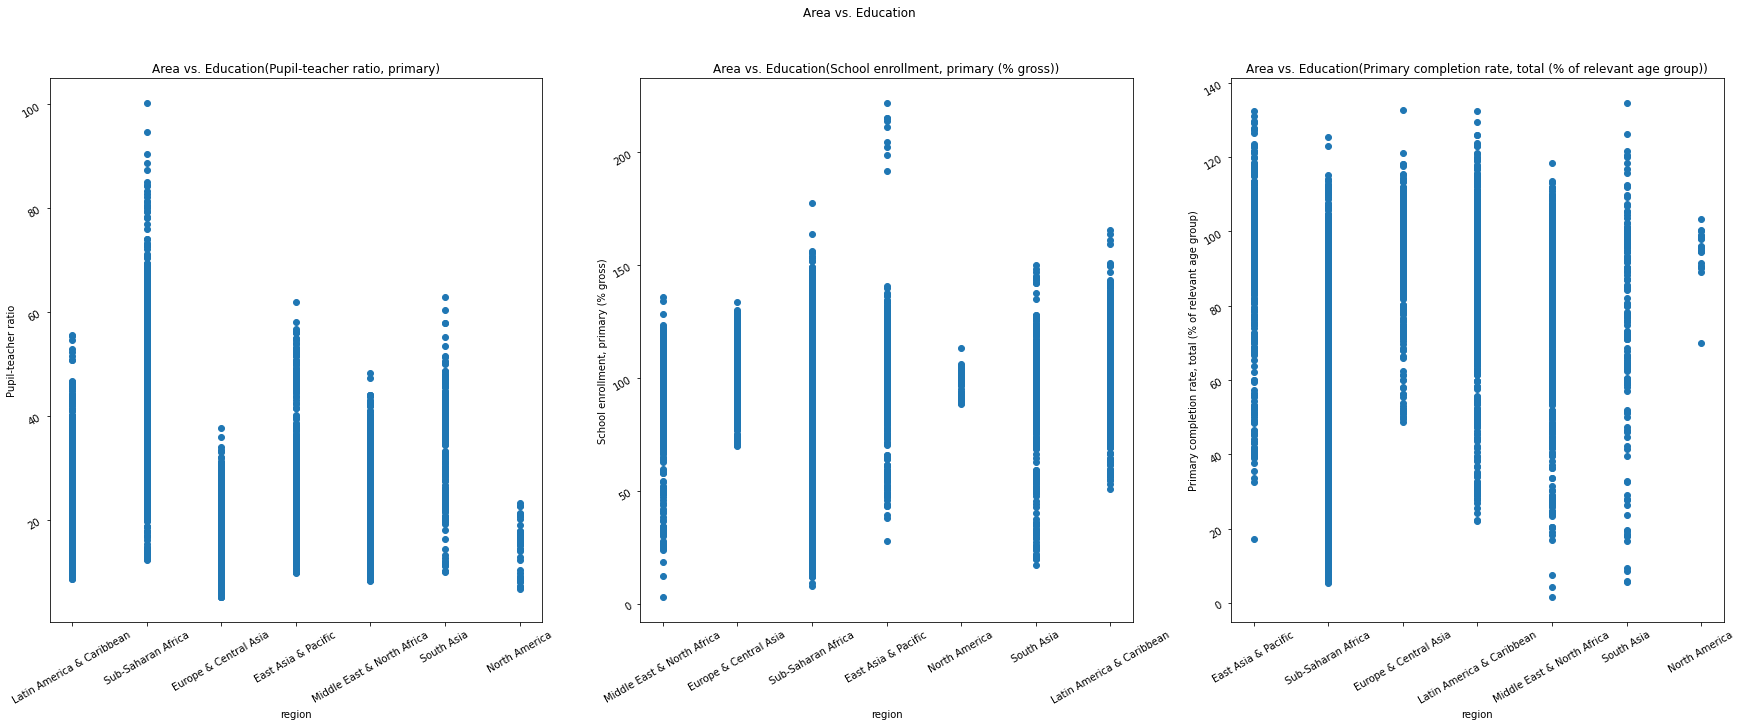

In [ ]:
fig, axs = plt.subplots(1, 3, figsize = (30, 10))
fig.suptitle('Area vs. Education')
axs[0].scatter(area_pupil['region'], area_pupil['education_indicator_value'])
axs[0].set_title('Area vs. Education(Pupil-teacher ratio, primary)')
axs[0].set_ylabel('Pupil-teacher ratio')
axs[1].scatter(area_enroll['region'], area_enroll['education_indicator_value'])
axs[1].set_title('Area vs. Education(School enrollment, primary (% gross))')
axs[1].set_ylabel('School enrollment, primary (% gross)')
axs[2].scatter(area_complete['region'], area_complete['education_indicator_value'])
axs[2].set_title('Area vs. Education(Primary completion rate, total (% of relevant age group))')
axs[2].set_ylabel('Primary completion rate, total (% of relevant age group)')

for ax in axs.flat:
    ax.set(xlabel = 'region')
    ax.tick_params(labelrotation=30)

As seen from the plots above, we indeed can verify that some regions (ex. North America and Europe) tend to have better education levels. But the correlation does not seem strong enough to consider "Area" as one of the machine learning features. Therefore, we will not use "Area" in *Data Prediction*.

#### Government Accounting Concept


Two types of government accounting concept:
1. Consolidated central government
2. Budgetary central government

Education indicators we are considering:
*   Inputs: Pupil-teacher ratio, primary
*   Participation: School enrollment, primary (% gross)
*   Outcome: Primary completion rate, total (% of relevant age group)

In [ ]:
%%bigquery accounting_education --project $project_id

SELECT t1.country_code, government_accounting_concept, education_indicator, education_indicator_value
FROM 
(
SELECT country_code, government_accounting_concept
FROM `bigquery-public-data.world_bank_intl_debt.country_summary` 
WHERE government_accounting_concept IS NOT NULL
) t1,
(
SELECT country_code, year, indicator_name AS education_indicator, value AS education_indicator_value
FROM `bigquery-public-data.world_bank_wdi.indicators_data` 
WHERE indicator_name = 'Pupil-teacher ratio, primary' OR
indicator_name = 'School enrollment, primary (% gross)' OR
indicator_name = 'Primary completion rate, total (% of relevant age group)'
) t2
WHERE t1.country_code = t2.country_code 

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
acc_pupil = accounting_education[accounting_education.education_indicator == 'Pupil-teacher ratio, primary']
acc_enroll = accounting_education[accounting_education.education_indicator == 'School enrollment, primary (% gross)']
acc_complete = accounting_education[accounting_education.education_indicator == 'Primary completion rate, total (% of relevant age group)']

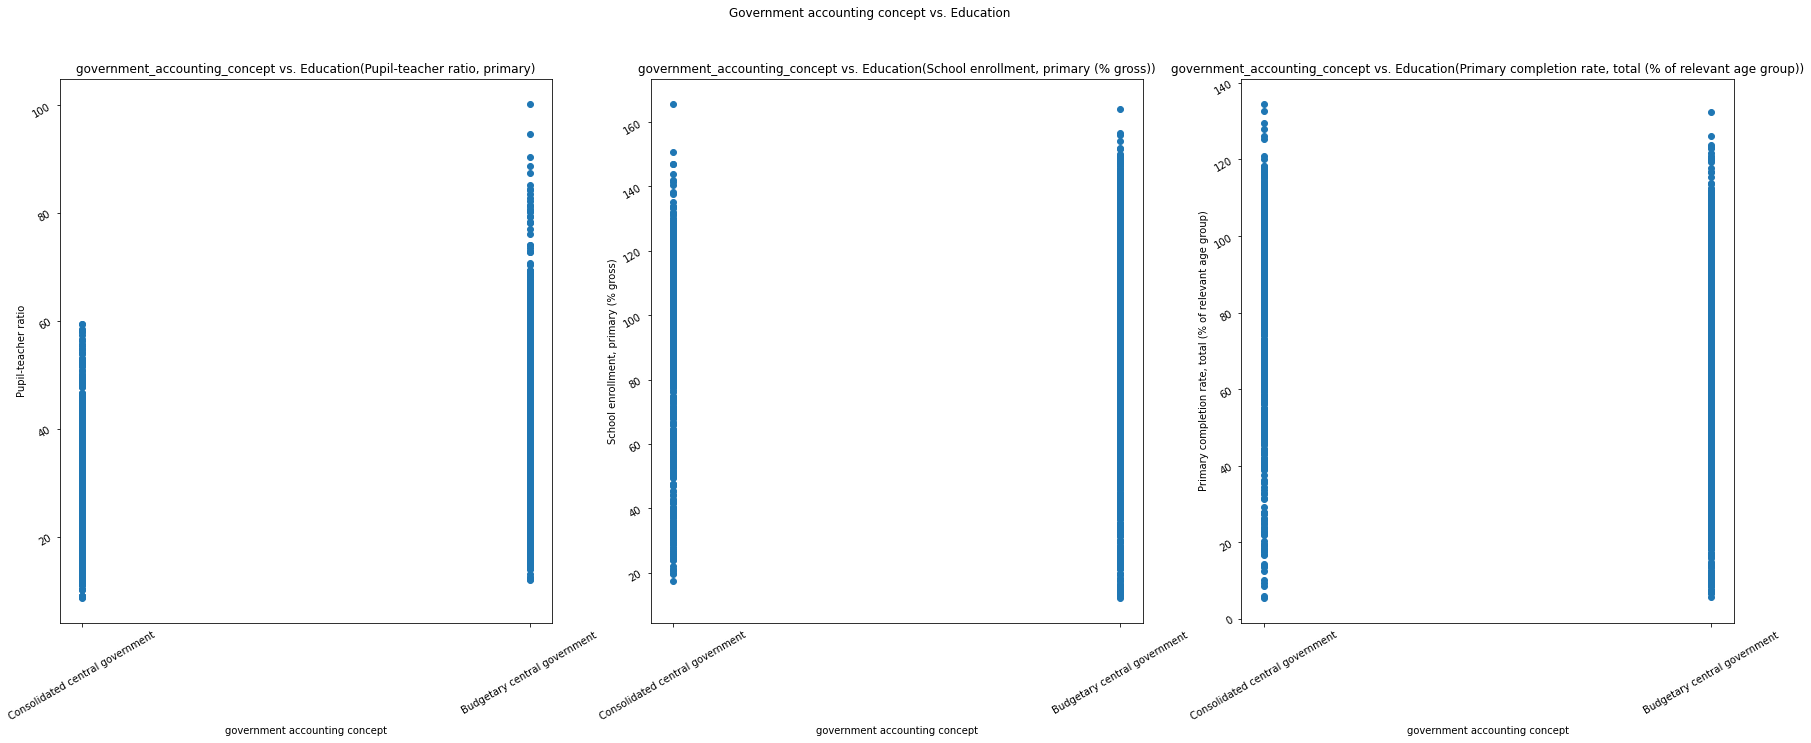

In [ ]:
fig, axs = plt.subplots(1, 3, figsize = (30, 10))
fig.suptitle('Government accounting concept vs. Education')
axs[0].scatter(acc_pupil['government_accounting_concept'], acc_pupil['education_indicator_value'])
axs[0].set_title('government_accounting_concept vs. Education(Pupil-teacher ratio, primary)')
axs[0].set_ylabel('Pupil-teacher ratio')
axs[1].scatter(acc_enroll['government_accounting_concept'], acc_enroll['education_indicator_value'])
axs[1].set_title('government_accounting_concept vs. Education(School enrollment, primary (% gross))')
axs[1].set_ylabel('School enrollment, primary (% gross)')
axs[2].scatter(acc_complete['government_accounting_concept'], acc_complete['education_indicator_value'])
axs[2].set_title('government_accounting_concept vs. Education(Primary completion rate, total (% of relevant age group))')
axs[2].set_ylabel('Primary completion rate, total (% of relevant age group)')

for ax in axs.flat:
    ax.set(xlabel = 'government accounting concept')
    ax.tick_params(labelrotation=30)

As seen from the plots above, we see that countries with consolidated central governments tend to have better education levels. But the correlation does not seem strong enough to consider "Government acounting concept" as one of the machine learning features. Therefore, we will not use "Government acounting concept" in *Data Prediction*.

#### Trade system vs. education

Two types of trading system:
1. General trade system
2. Special trade system

In [ ]:
%%bigquery trade_education --project $project_id

SELECT system_of_trade, education_indicator, education_indicator_value
FROM 
(
SELECT country_code, system_of_trade
FROM `bigquery-public-data.world_bank_intl_debt.country_summary` 
WHERE system_of_trade IS NOT NULL
) t1,
(
SELECT country_code, year, indicator_name AS education_indicator, value AS education_indicator_value
FROM `bigquery-public-data.world_bank_wdi.indicators_data` 
WHERE indicator_name = 'Pupil-teacher ratio, primary' OR
indicator_name = 'School enrollment, primary (% gross)' OR
indicator_name = 'Primary completion rate, total (% of relevant age group)'
) t2
WHERE t1.country_code = t2.country_code

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
trade_pupil = trade_education[trade_education.education_indicator == 'Pupil-teacher ratio, primary']
trade_enroll = trade_education[trade_education.education_indicator == 'School enrollment, primary (% gross)']
trade_complete = trade_education[trade_education.education_indicator == 'Primary completion rate, total (% of relevant age group)']

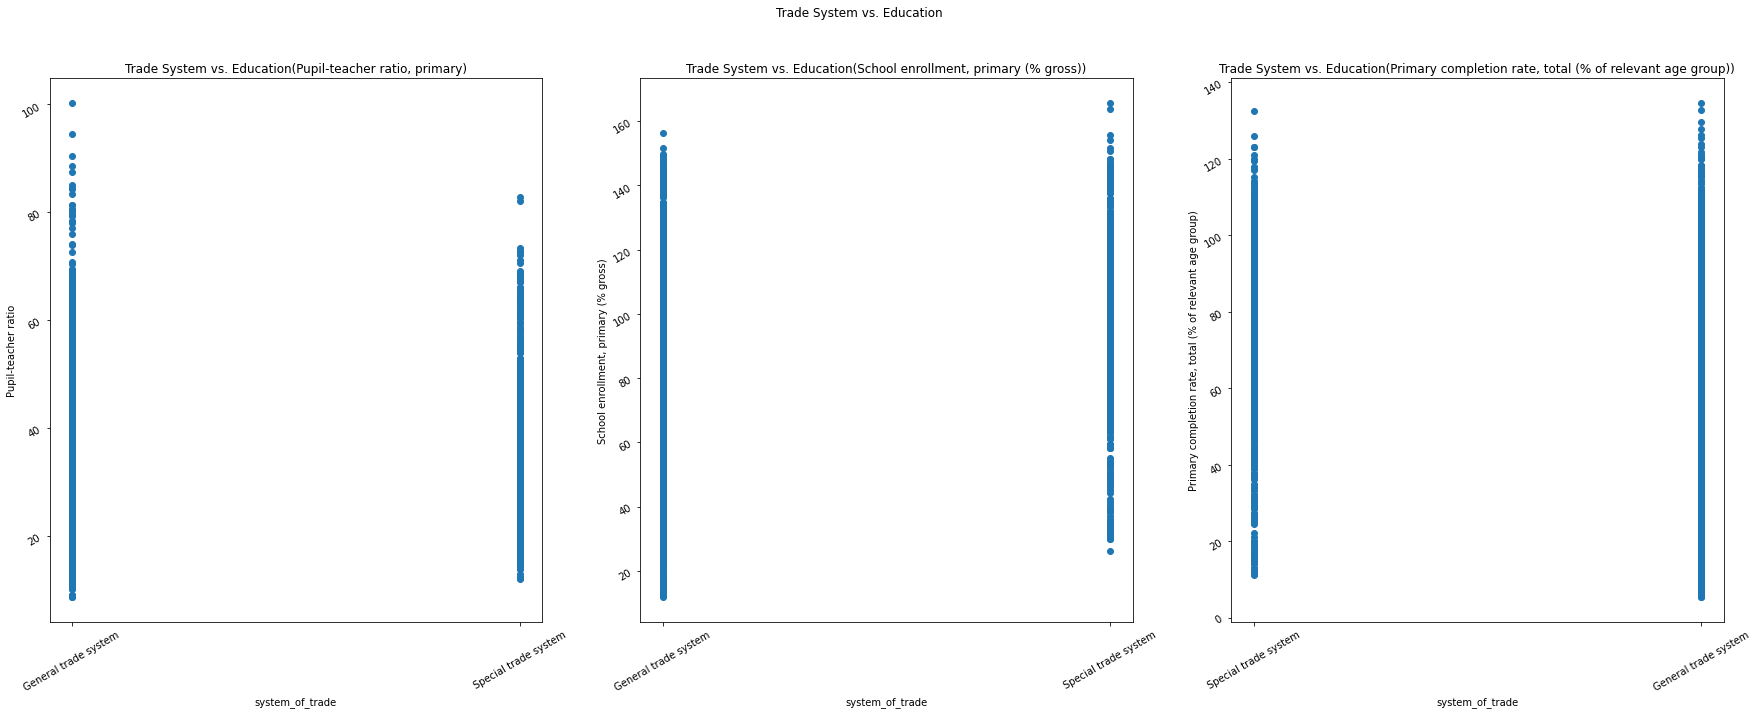

In [ ]:
fig, axs = plt.subplots(1, 3, figsize = (30, 10))
fig.suptitle('Trade System vs. Education')
axs[0].scatter(trade_pupil['system_of_trade'], trade_pupil['education_indicator_value'])
axs[0].set_title('Trade System vs. Education(Pupil-teacher ratio, primary)')
axs[0].set_ylabel('Pupil-teacher ratio')
axs[1].scatter(trade_enroll['system_of_trade'], trade_enroll['education_indicator_value'])
axs[1].set_title('Trade System vs. Education(School enrollment, primary (% gross))')
axs[1].set_ylabel('School enrollment, primary (% gross)')
axs[2].scatter(trade_complete['system_of_trade'], trade_complete['education_indicator_value'])
axs[2].set_title('Trade System vs. Education(Primary completion rate, total (% of relevant age group))')
axs[2].set_ylabel('Primary completion rate, total (% of relevant age group)')

for ax in axs.flat:
    ax.set(xlabel = 'system_of_trade')
    ax.tick_params(labelrotation=30)

It is pretty much the same case as above. We can see that countries with special trade system tend to have better education levels from the plots. But the correlation does not seem strong enough to consider "trade system" as one of the machine learning features. 

## Data Prediction

### Logistic Regression

We will use a combination of several factors we analyzed in the *Data Exploration* section to make predictions. We will attempt to make predictions for `pupil-teacher ratio`, since it is stated as one of the strongest indicators of student success and engagement in many researches.

We divide the dataset in the following manner:

* Training set: data before year 2010
* Evaluation set: data after year 2010 and before 2015
* Testing set: data after year 2015

We will test four features that appeared to have higher correlation in our analysis: Life expectancy (years), Physicians (per 1000 people),  Cause of death by communicable diseases (%), and People with safe water service (%).

##### Labeling
Since I want to do a multiclass classification task, the first thing is to label the dataset based on the `pupil-teacher ratio` attribute. Although there is still a lack of information in terms of what count as a high education level, a pupil-teacher ratio under 20 is considered generally as a good setting in many researches. Therefore, we label data with `pupil-teacher ratio` under 20 as "HIGH", between 20 and 40 as "MEDIUM", and above 40 as "LOW". 

As seen from the analysis below, most of the countries fall into the "MEDIUM" class.

In [ ]:
%%bigquery avg_education_value --project $project_id

SELECT t1.country_code, avg_pupil_teacher_ratio, avg_enrollment_rate, avg_completion_rate
FROM
(SELECT country_code, AVG(value) AS avg_pupil_teacher_ratio
FROM `bigquery-public-data.world_bank_wdi.indicators_data` 
WHERE indicator_name = 'Pupil-teacher ratio, primary' 
GROUP BY country_code) t1,
(SELECT country_code, AVG(value) AS avg_enrollment_rate
FROM `bigquery-public-data.world_bank_wdi.indicators_data` 
WHERE indicator_name = 'School enrollment, primary (% gross)'
GROUP BY country_code) t2,
(SELECT country_code, AVG(value) AS avg_completion_rate
FROM `bigquery-public-data.world_bank_wdi.indicators_data` 
WHERE indicator_name = 'Primary completion rate, total (% of relevant age group)'
GROUP BY country_code) t3
WHERE t1.country_code = t2.country_code AND t2.country_code = t3.country_code

Query is running:   0%|          |

Downloading:   0%|          |

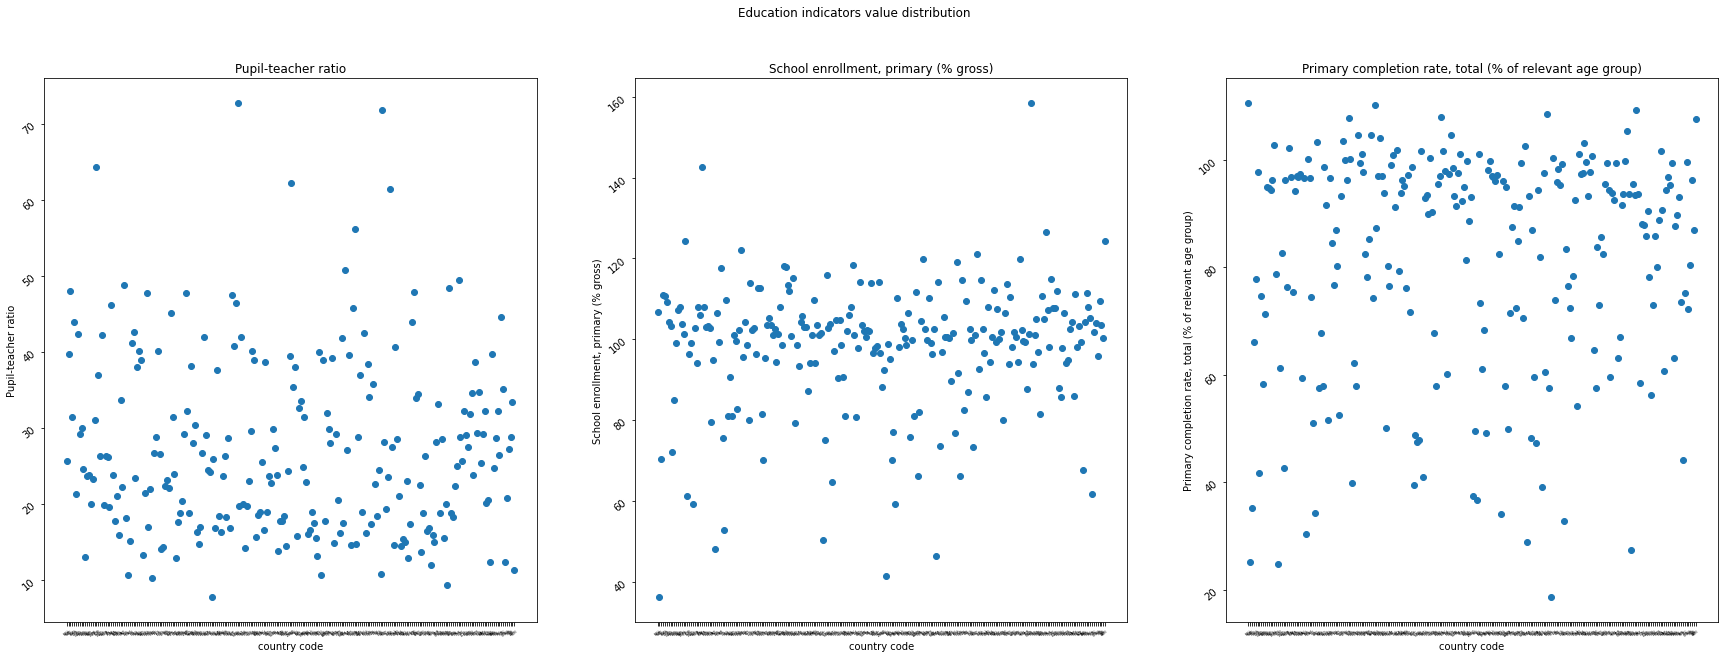

In [ ]:
# plot three education indicators separately to see their value range

fig, axs = plt.subplots(1, 3, figsize = (30, 10))
fig.suptitle('Education indicators value distribution')

axs[0].scatter(avg_education_value['country_code'], avg_education_value['avg_pupil_teacher_ratio'])
axs[0].set_title('Pupil-teacher ratio')
axs[0].set_ylabel('Pupil-teacher ratio')

axs[1].scatter(avg_education_value['country_code'], avg_education_value['avg_enrollment_rate'])
axs[1].set_title('School enrollment, primary (% gross)')
axs[1].set_ylabel('School enrollment, primary (% gross)')

axs[2].scatter(avg_education_value['country_code'], avg_education_value['avg_completion_rate'])
axs[2].set_title('Primary completion rate, total (% of relevant age group)')
axs[2].set_ylabel('Primary completion rate, total (% of relevant age group)')

for ax in axs.flat:
    ax.set(xlabel = 'country code')
    ax.tick_params(labelrotation=40)
    ax.tick_params(axis='x', labelsize=3)

##### Preparing dataset

In [ ]:
# create a dataset to store the model

model_dataset_name = 'classify_pupil_teacher_ratio'

dataset = bigquery.Dataset(client.dataset(model_dataset_name))
dataset.location = 'US'
client.create_dataset(dataset)

Dataset(DatasetReference('final-project-370701', 'classify_pupil_teacher_ratio'))

In [ ]:
# extract training data from bigquery

%%bigquery --project $project_id

SELECT 
  CASE
    WHEN pupil_teacher_ratio < 20 THEN 'HIGH'
    WHEN pupil_teacher_ratio > 20 AND pupil_teacher_ratio < 40 THEN 'MEDIUM'
    ELSE 'LOW'
  END AS label,
  t1.country_code, 
  t1.year,
  life_exp, 
  physicians, 
  cause_death,
  water_service
FROM 
(
SELECT country_code, year, value AS pupil_teacher_ratio
FROM `bigquery-public-data.world_bank_wdi.indicators_data` 
WHERE indicator_name = 'Pupil-teacher ratio, primary' 
) t1,
(
SELECT country_code, year, value AS life_exp
FROM `bigquery-public-data.world_bank_health_population.health_nutrition_population` 
WHERE indicator_name = 'Life expectancy at birth, total (years)'
) t2,
(
SELECT country_code, year, value AS physicians
FROM `bigquery-public-data.world_bank_health_population.health_nutrition_population` 
WHERE indicator_name = 'Physicians (per 1,000 people)'
) t3,
(
SELECT country_code, year, value AS cause_death
FROM `bigquery-public-data.world_bank_health_population.health_nutrition_population` 
WHERE indicator_name = 'Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)'
) t4,
(
SELECT country_code, year, value AS water_service
FROM `bigquery-public-data.world_bank_health_population.health_nutrition_population` 
WHERE indicator_name = 'People using safely managed drinking water services (% of population)'
) t5
WHERE t1.country_code = t2.country_code AND t1.year = t2.year AND
t2.country_code = t3.country_code AND t2.year = t3.year AND
t3.country_code = t4.country_code  AND t3.year = t4.year AND
t4.country_code = t5.country_code  AND t4.year = t5.year
LIMIT 10

Query is running:   0%|          |

Downloading:   0%|          |

,label,country_code,year,life_exp,physicians,cause_death,water_service
0,MEDIUM,NGA,2010,50.896000,0.183600,68.935525,17.932029
1,HIGH,BHR,2015,76.762000,0.925700,5.611540,98.983262
2,HIGH,UMC,2010,73.470728,1.645280,8.738446,72.288386
3,MEDIUM,MDA,2000,67.006000,2.455300,5.362183,40.397322
4,HIGH,AZE,2010,70.938000,3.662900,10.238266,76.665103
5,MEDIUM,UZB,2000,67.156000,2.962800,20.336482,56.340990
6,HIGH,ROU,2010,73.458537,2.480400,3.473531,81.885525
7,MEDIUM,TLA,2000,71.534357,1.519589,20.065316,62.441174
8,HIGH,AUT,2010,80.580488,4.801600,2.773062,98.517611
9,HIGH,OED,2010,79.148887,2.630632,6.789882,90.779422


#### Training

In [ ]:
%%bigquery --project $project_id

# YOUR QUERY HERE
CREATE OR REPLACE MODEL `classify_pupil.classify_pupil_model` -- we'll call our model 'bikeshare_model'
OPTIONS(model_type='logistic_reg') AS
SELECT
  ml_database_pupil.label AS label,
  ml_database_pupil.life_exp AS feature_life_expectancy,
  ml_database_pupil.physicians AS feature_physicians,
  ml_database_pupil.cause_death aS feature_cause_death,
  ml_database_pupil.water_service aS feature_water_service
FROM (

  SELECT 
  CASE
    WHEN pupil_teacher_ratio < 20 THEN 'HIGH'
    WHEN pupil_teacher_ratio > 20 AND pupil_teacher_ratio < 40 THEN 'MEDIUM'
    ELSE 'LOW'
  END AS label,
  t1.country_code, 
  t1.year,
  life_exp, 
  physicians, 
  cause_death,
  water_service
  FROM 
  (
  SELECT country_code, year, value AS pupil_teacher_ratio
  FROM `bigquery-public-data.world_bank_wdi.indicators_data` 
  WHERE indicator_name = 'Pupil-teacher ratio, primary' 
  ) t1,
  (
  SELECT country_code, year, value AS life_exp
  FROM `bigquery-public-data.world_bank_health_population.health_nutrition_population` 
  WHERE indicator_name = 'Life expectancy at birth, total (years)'
  ) t2,
  (
  SELECT country_code, year, value AS physicians
  FROM `bigquery-public-data.world_bank_health_population.health_nutrition_population` 
  WHERE indicator_name = 'Physicians (per 1,000 people)'
  ) t3,
  (
  SELECT country_code, year, value AS cause_death
  FROM `bigquery-public-data.world_bank_health_population.health_nutrition_population` 
  WHERE indicator_name = 'Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)'
  ) t4,
  (
  SELECT country_code, year, value AS water_service
  FROM `bigquery-public-data.world_bank_health_population.health_nutrition_population` 
  WHERE indicator_name = 'People using safely managed drinking water services (% of population)'
  ) t5
  WHERE t1.country_code = t2.country_code AND t1.year = t2.year AND
  t2.country_code = t3.country_code AND t2.year = t3.year AND
  t3.country_code = t4.country_code  AND t3.year = t4.year AND
  t4.country_code = t5.country_code  AND t4.year = t5.year

) AS ml_database_pupil 
WHERE
  ml_database_pupil.year <= 2000

Query is running:   0%|          |

""


#### Training stats

In [ ]:
%%bigquery --project $project_id

SELECT
  *
FROM
  ML.TRAINING_INFO(MODEL `classify_pupil.classify_pupil_model`)

Query is running:   0%|          |

Downloading:   0%|          |

,training_run,iteration,loss,eval_loss,learning_rate,duration_ms
0,0,15,0.083289,NaN,3.2,3132
1,0,14,0.084126,NaN,3.2,2930
2,0,13,0.085398,NaN,1.6,2913
3,0,12,0.086406,NaN,3.2,3061
4,0,11,0.087946,NaN,1.6,2986
5,0,10,0.089258,NaN,3.2,2960
6,0,9,0.091267,NaN,1.6,2968
7,0,8,0.092925,NaN,1.6,3426
8,0,7,0.095200,NaN,3.2,2850
9,0,6,0.098037,NaN,1.6,2944


The NaN for "eval_loss" might be caused by gradient explosion. But in general, we can still see that the training loss decreases by each iteration.

#### Validation

Now let's validate the model on the unseen validation dataset.

In [ ]:
%%bigquery --project $project_id

SELECT
  *
FROM
  ML.EVALUATE(MODEL `classify_pupil.classify_pupil_model`, (
  SELECT
    ml_database_pupil.label AS label,
    ml_database_pupil.life_exp AS feature_life_expectancy,
    ml_database_pupil.physicians AS feature_physicians,
    ml_database_pupil.cause_death aS feature_cause_death,
    ml_database_pupil.water_service aS feature_water_service
  FROM (

    SELECT 
      CASE
        WHEN pupil_teacher_ratio < 20 THEN 'HIGH'
        WHEN pupil_teacher_ratio > 20 AND pupil_teacher_ratio < 40 THEN 'MEDIUM'
        ELSE 'LOW'
      END AS label,
      t1.country_code, 
      t1.year,
      life_exp, 
      physicians, 
      cause_death,
      water_service
    FROM 
      (
      SELECT country_code, year, value AS pupil_teacher_ratio
      FROM `bigquery-public-data.world_bank_wdi.indicators_data` 
      WHERE indicator_name = 'Pupil-teacher ratio, primary' 
      ) t1,
      (
      SELECT country_code, year, value AS life_exp
      FROM `bigquery-public-data.world_bank_health_population.health_nutrition_population` 
      WHERE indicator_name = 'Life expectancy at birth, total (years)'
      ) t2,
      (
      SELECT country_code, year, value AS physicians
      FROM `bigquery-public-data.world_bank_health_population.health_nutrition_population` 
      WHERE indicator_name = 'Physicians (per 1,000 people)'
      ) t3,
      (
      SELECT country_code, year, value AS cause_death
      FROM `bigquery-public-data.world_bank_health_population.health_nutrition_population` 
      WHERE indicator_name = 'Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)'
      ) t4,
      (
      SELECT country_code, year, value AS water_service
      FROM `bigquery-public-data.world_bank_health_population.health_nutrition_population` 
      WHERE indicator_name = 'People using safely managed drinking water services (% of population)'
      ) t5
    WHERE t1.country_code = t2.country_code AND t1.year = t2.year AND
    t2.country_code = t3.country_code AND t2.year = t3.year AND
    t3.country_code = t4.country_code  AND t3.year = t4.year AND
    t4.country_code = t5.country_code  AND t4.year = t5.year

  ) AS ml_database_pupil 
WHERE
  ml_database_pupil.year > 2000 AND ml_database_pupil.year <= 2010)) 

Query is running:   0%|          |

Downloading:   0%|          |

,precision,recall,accuracy,f1_score,log_loss,roc_auc
0,0.485185,0.557692,0.714286,0.505056,0.839003,0.920794


The accuracy for the validation set is around 0.71. The precision score is slightly low which means the validaton dataset might have imbalanced class. In my case, false negative and false positive do not matter that much, so we are mainly looking at the accuracy value.

#### Testing

In [ ]:
%%bigquery --project $project_id

SELECT
  *
FROM
  ML.PREDICT(MODEL `classify_pupil.classify_pupil_model`, (
  SELECT
    ml_database_pupil.label AS label,
    ml_database_pupil.life_exp AS feature_life_expectancy,
    ml_database_pupil.physicians AS feature_physicians,
    ml_database_pupil.cause_death aS feature_cause_death,
    ml_database_pupil.water_service aS feature_water_service
  FROM (

    SELECT 
      CASE
        WHEN pupil_teacher_ratio < 20 THEN 'HIGH'
        WHEN pupil_teacher_ratio > 20 AND pupil_teacher_ratio < 40 THEN 'MEDIUM'
        ELSE 'LOW'
      END AS label,
      t1.country_code, 
      t1.year,
      life_exp, 
      physicians, 
      cause_death,
      water_service
    FROM 
      (
      SELECT country_code, year, value AS pupil_teacher_ratio
      FROM `bigquery-public-data.world_bank_wdi.indicators_data` 
      WHERE indicator_name = 'Pupil-teacher ratio, primary' 
      ) t1,
      (
      SELECT country_code, year, value AS life_exp
      FROM `bigquery-public-data.world_bank_health_population.health_nutrition_population` 
      WHERE indicator_name = 'Life expectancy at birth, total (years)'
      ) t2,
      (
      SELECT country_code, year, value AS physicians
      FROM `bigquery-public-data.world_bank_health_population.health_nutrition_population` 
      WHERE indicator_name = 'Physicians (per 1,000 people)'
      ) t3,
      (
      SELECT country_code, year, value AS cause_death
      FROM `bigquery-public-data.world_bank_health_population.health_nutrition_population` 
      WHERE indicator_name = 'Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)'
      ) t4,
      (
      SELECT country_code, year, value AS water_service
      FROM `bigquery-public-data.world_bank_health_population.health_nutrition_population` 
      WHERE indicator_name = 'People using safely managed drinking water services (% of population)'
      ) t5
    WHERE t1.country_code = t2.country_code AND t1.year = t2.year AND
    t2.country_code = t3.country_code AND t2.year = t3.year AND
    t3.country_code = t4.country_code  AND t3.year = t4.year AND
    t4.country_code = t5.country_code  AND t4.year = t5.year

  ) AS ml_database_pupil 
WHERE
  ml_database_pupil.year >= 2015 
LIMIT 10)) 

Query is running:   0%|          |

Downloading:   0%|          |

,predicted_label,predicted_label_probs,label,feature_life_expectancy,feature_physicians,feature_cause_death,feature_water_service
0,HIGH,"[{'label': 'HIGH', 'prob': 0.9990166593323779}...",HIGH,80.641463,4.1342,5.006823,99.959178
1,MEDIUM,"[{'label': 'MEDIUM', 'prob': 0.776960774790471...",MEDIUM,60.910000,0.1021,54.350441,39.323429
2,HIGH,"[{'label': 'HIGH', 'prob': 0.70215518154109}, ...",HIGH,71.478000,2.4836,4.790954,72.492568
3,HIGH,"[{'label': 'HIGH', 'prob': 0.9677966832548748}...",HIGH,78.690244,2.5781,5.651203,96.413268
4,HIGH,"[{'label': 'HIGH', 'prob': 0.988781423050674},...",HIGH,74.480488,3.1656,2.655412,95.010164
5,HIGH,"[{'label': 'HIGH', 'prob': 0.9985883470207668}...",HIGH,74.321951,4.2993,3.399044,93.543454
6,HIGH,"[{'label': 'HIGH', 'prob': 0.9318391938610122}...",HIGH,75.406000,2.8736,1.820788,80.349236
7,HIGH,"[{'label': 'HIGH', 'prob': 0.881382851044667},...",HIGH,76.865000,2.1616,1.931848,88.825128
8,HIGH,"[{'label': 'HIGH', 'prob': 0.9951449092828049}...",HIGH,82.051220,3.4618,10.214405,99.527296
9,HIGH,"[{'label': 'HIGH', 'prob': 0.7768162491660882}...",HIGH,75.287805,2.4603,2.594807,74.899154


## Conclusion
In this section, I will go back to *Project Overview* and try to answer the subquestions I listed.

##### Impact of Income

The impact of a country's income on its education level is suprisingly not that significant. Originally, I was trying to look for factors "other than" income since I assume income will affect education directly. However, in the `Data Exploration` section, we see that low income countries can have high government budget (% of total) on education. Of course we see a slightly better performance on school enrollment rate for high income countries, still, the difference is not that significant as expected. Apparently, to evaluate education level and find factors that affect it, we need to look into various indicators and more underlying factors.

##### Impact of trade system
The trade system of a country does have some correlation with education level as shown in the *Data Exploration* section. Countries with special trade system tend to have better education levels (in terms of pupil-teacher ratio, school enrollment rate, and primary completion rate). Even though the correlation is not strong enough for me to put it into data prediction, trade system does tell a little about the country's education level.

Impact of government accounting system

Similar to trade system, the government accounting system of a country does have some correlation with education level as shown in the *Data Exploration* section. Countries with consolidated central system tend to have better education levels (in terms of pupil-teacher ratio, school enrollment rate, and primary completion rate). Even though the correlation is not strong enough for me to put it into data prediction, government accounting system does tell a little about the country's education level.

##### Impact of health

The impact of health on education indicators is significant. Most of the health indicators show a strong correlation with education level. Although health and education does not seem to link to each other, it is clear from the *Data Prediction* and *Data Exploration* sections that they are highly related.

##### Education level over time

It is surprising to me that some education indicators are not improving since 1970s at all. The main reason might be that government has kept the percentage of education budget the same over the years. However, as population grow dramatically, it is difficult to maintain the same learning environment with the same governemnt input.

##### Summary

In this project, I attempt to discover the underlying factors that affect a country's education level. It is surprising to learn that education levels are not improving over time and income does not play a significant role in determining education levels as I first thought. Health indicators, however, show a strong correlation with education. By providing safer water management services to more people, increasing the number of physicians in a country, and decreasing the percentage of communicable diseases, the country's education level will surely improve!
